# Business Problem

**Problem Statement:**
The bank aims to enhance revenue by increasing subscriptions to long-term deposits among its clients through targeted telemarketing. The objective is to predict which clients are more likely to subscribe, optimizing marketing efforts to improve conversion rates and overall customer satisfaction.

**Project Background:**
In the competitive banking industry, effective marketing strategies are crucial for maximizing returns on marketing investments. By analyzing customer demographics and relevant banking data, the bank aims to predict customer behaviors related to savings and identify potential term deposit subscribers. This predictive capability will enable targeted marketing campaigns that efficiently secure deposits while enhancing customer satisfaction by minimizing irrelevant advertisements.

## Dataset

- **Dataset Link**: [Bank Marketing Dataset](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)
- **Description**: The dataset contains information related to direct marketing campaigns of a Portuguese banking institution, including features such as client demographics, economic indicators, and campaign outcome (target variable).

## Table of Contents

1. **Data Exploration**
   - Importing Libraries
   - Loading Dataset
   - Feature Description
   - Summary of Features

2. **Preparing the Dataset for Machine Learning**
   - Defining the Target Variable (Y) and Independent Variables (X)
   - Splitting Data into Numerical and Categorical Features
   - Handling Missing Values
   - Outlier Analysis of Numerical Features
     - Capping and Flooring of Outliers
   - Feature Selection
     - Numerical Features
       - Removing Features with Zero Variance
       - Bi-Variate Analysis (Feature Discretization)
       - Insights
     - Categorical Features
       - Bivariate Analysis
       - Insights

3. **Encoding Categorical Variables**
   - Encoding Categorical Variables into Dummy Variables for Machine Learning

4. **Train-Test Split**

5. **Model Building**
   - **Logistic Regression**
     - Understanding Logistic Regression Coefficients
     - Insights from Logistic Regression Analysis
   - **Decision Tree**
   - **Random Forest**
   - **Gradient Boosting**
   - **Stacking Classifier**

6. **Model Evaluation**
   - Performance Metrics (Accuracy, Precision, Recall, F1-score)
   - Confusion Matrix Analysis

7. **Marketing Campaign Effectiveness: Insights Report**
   - Gains Chart Analysis
   - Conclusion and Next Steps

8. **Practical Recommendations**
   - Step 1: Create Target Zones
   - Step 2: Slice the Data Based on Top Predicted Customers from the GBM Model Output
   - Step 3: Prioritize by Call Duration



## Data Exploration

### Importing Libraries

In [2789]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install --upgrade scikit-learn --quiet

from sklearn import metrics
from sklearn.metrics import confusion_matrix
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# Importing VarianceThreshold from scikit-learn library for feature selection
from sklearn.feature_selection import VarianceThreshold
import warnings
from sklearn.preprocessing import KBinsDiscretizer
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier


### Loading Dataset

In [2790]:
#import os
#os.getcwd()

In [2791]:
bank_df = pd.read_csv(r"../data/archive/bank-additional-full.csv",delimiter=';')


In [2792]:
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2793]:
bank_df.shape

(41188, 21)

In [2794]:
print(f'The dataset has {len(bank_df)} records from past telemarketing campaigns.')
print(f'Each record has {bank_df.shape[1]-1} features,')
print('and the last column in the dataframe indicates the binary outcome(y/target) of the campaign (subscribed or not subscribed to the term deposit).')


The dataset has 41188 records from past telemarketing campaigns.
Each record has 20 features,
and the last column in the dataframe indicates the binary outcome(y/target) of the campaign (subscribed or not subscribed to the term deposit).


### Feature Description

In [2795]:
feature_desc = pd.read_excel(r"..\data\Feature_Dataset.xlsx")

In [2796]:
feature_desc

,Variable,Description
0,Age,Age of Customer
1,Job,"Type of Job (Categorical ""admin"", ""blue-collar"", ""entrepreneur"", ""housemaid"", ""management"", ""retired"", ""self-\nemployed"", ""services"", ""student"", ""technician"", ""unemployed"", ""unknown"")"
2,Marital,"marital status(categorical: ""divorced"", ""married"", ""single"", ""unknown"")"
3,education,"(categorical: ""basic.4y"", ""basic.6y"", ""basic.9y"", ""high.school"", ""illiterate"", ""professional.course"", ""university.degree"", ""unknown"")"
4,default,"default: has credit in default? (categorical: ""no"", ""yes"", ""unknown"")"
5,housing,"housing: has housing loan? (categorical: ""no"", ""yes"", ""unknown"")"
6,loan,"loan: has personal loan? (categorical: ""no"", ""yes"", ""unknown"")"
7,contact,"contact: contact communication type (categorical: ""cellular"", ""telephone"")"
8,month,"month: last contact month of year (categorical: ""jan"", ""feb"", ""mar"", ..., ""nov"", ""dec"")"
9,day_of_week,"day_of_week: last contact day of the week (categorical: ""mon"", ""tue"", ""wed"", ""thu"", ""fri"")"


The Binary classification goal is to predict if the client will subscribe a bank term deposit.\
The features can be broadly divided into the following 3 categories:

### Summary of Features

- **Client Data**: This includes demographic and personal information about the clients, such as age, job type, marital status, education level, default status, housing loan status, and personal loan status.
- **Campaign Data**: These features are related to the bank's marketing campaigns, including the type of communication (**telephone or cellular**), the month and day of the last contact, the duration of the last contact, the number of contacts during the current campaign, days since the last contact from a previous campaign, the number of previous contacts, and the outcome of the previous campaign.
- **Economy Data**: These features provide economic context, including the employment variation rate, consumer price index, consumer confidence index, **euribor 3-month rate** (the rate at which banks lend money to each other), and the number of employees.
- **Target Variable**: This indicates whether the client has subscribed to a term deposit (1 for yes, 0 for no).


## Preparing the Dataset for Machine Learning

**Purpose of the Code:**
The code snippet's primary goal is to prepare the dataset for machine learning by defining the target variable (the variable we want to predict) and the independent variables (the variables we use to make predictions). This step is crucial for any supervised learning task.


#### Defining the Target Variable (Y) and Independent Variables (X)


#### Labeling the Target Feature (Y):
- **What it does:** This line of code converts the original target feature y, which contains the values 'yes' and 'no', into a binary numeric format. Specifically, it changes 'yes' to 1 (indicating the client subscribed to a term deposit) and 'no' to 0 (indicating the client did not subscribe).

- **Why it helps:** Machine learning algorithms generally work better with numeric data. By converting the target variable to 0 and 1, we make it suitable for modeling.


In [2797]:
bank_df['target']= np.where(bank_df['y']=='yes',1,0)

In [2798]:
# Dropping the Original Target Feature:
# This line removes the original y column from the dataset.
bank_df = bank_df.drop(['y'], axis=1)

In [2799]:
# Defining the New Target Variable (Y):
# This line creates a new DataFrame Y that contains only the target column.
Y = bank_df[['target']]

In [2800]:
# Defining the Independent Variables (X):
# This line creates a new DataFrame X by dropping the target column from bank_df.
# X now contains all the other columns that will be used as features for predicting the target variable.
# Why it helps: Separating X and Y allows us to clearly distinguish between the features (input) and the target (output) when training the model.

X = bank_df.drop(['target'],axis=1)

In [2801]:
X.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [2802]:
Y.head(5)

,target
0,0
1,0
2,0
3,0
4,0


In [2803]:
print(f'The shape of X dataframe:{X.shape}')
print(f'The shape of Y dataframe:{Y.shape}')
      
      

The shape of X dataframe:(41188, 20)
The shape of Y dataframe:(41188, 1)


#### Getting the Event Rate:

- **Purpose:**
The purpose of calculating the event rate is to understand the proportion of positive outcomes (events) in our target variable. In simpler terms, it helps us see how often the event we're interested in (e.g., subscribing to a term deposit) occurs in our dataset.
- **What it does:** This line calculates the mean of the target variable Y. Since Y contains binary values (0s and 1s), taking the mean essentially calculates the proportion of 1s in Y, which represents the event rate.
- **Why it helps:** By computing the mean of Y, we get a percentage value that tells us the frequency of positive outcomes (events) in our dataset.

In [2804]:
Y.mean()

target    0.112654
dtype: float64

In [2805]:
Y.sum()

target    4640
dtype: int64

- **What it means:** The output indicates that the event rate (proportion of positive outcomes) in the target variable is approximately 11.27%. This means that around 11.27% of the clients in the dataset have subscribed to a term deposit.
- **Why it matters:** Understanding the event rate is essential for various purposes, such as assessing the imbalance in the dataset (if the event rate is too low or too high), setting performance benchmarks for models, and interpreting model predictions effectively.

#### Summary of Why This is Done
- **Labeling:** Converts categorical target variable into a numeric format for compatibility with machine learning algorithms.
- **Dropping Original Target:** Removes redundancy and cleans the dataset.
- **Defining Y:** Isolates the target variable for model training.
- **Defining X:** Isolates the feature set for model input.

This steps are fundamental in preparing the data for machine learning, ensuring that the input (features) and output (target) are correctly formatted and separated. This makes the subsequent modeling process straightforward and efficient.

### Splitting Data into Numerical and Categorical Features:

- **Purpose:**
The objective of this section is to categorize the dataset into numerical and categorical features, which enables customized preprocessing for each feature type.



In [2806]:
# This code inspects the data types of each column in the dataset, distinguishing between numerical and categorical features based on their data type.
# Understanding the data types is crucial for applying appropriate preprocessing techniques.
# It allows us to identify which features require numerical transformations, such as scaling or normalization, and which features need categorical encoding.

X.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object

In [2807]:
X['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

**Description of 'pdays' :** Number of days since the client was last contacted from a previous campaign (999 means the client was not previously contacted).
so this can be included in categories as 'yes' means previously contacted and 'No' means not previously contacted

In [2808]:
X['pdays'] = np.where(X['pdays'] == 999, 'No', 'Yes')


In [2809]:
numerical_columns = X.select_dtypes(include='number')


#### Numerical Features Identification

- **What it does:**
This line selects columns from the dataset that have numerical data types.

- **How it helps:**
Separating numerical features enables us to focus on preprocessing steps tailored specifically to numerical data, such as **handling outliers or missing values.**

In [2810]:
categorical_columns = X.select_dtypes(include='object')

#### Categorical Features Identification

- **What it does:**
This line selects columns from the dataset that have categorical data types.

- **How it helps:**
Isolating categorical features facilitates the application of categorical encoding techniques, such as one-hot encoding or label encoding, to prepare the data for machine learning algorithms.

In [2811]:
numerical_columns.head(2)

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,0,1.1,93.994,-36.4,4.857,5191.0


In [2812]:
numerical_columns.shape

(41188, 9)

In [2813]:
categorical_columns.head(2)

,job,marital,education,default,housing,loan,contact,month,day_of_week,pdays,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,No,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,No,nonexistent


In [2814]:
categorical_columns.shape

(41188, 11)

#### Determining Unique Levels for Numerical Features

- **What it does:**
In this section, we define a function unique_levels that takes a numerical feature x as input. Inside this function, we use the value_counts() method, which counts the occurrences of each unique value in the feature. Then, we apply the count() method to the result of value_counts() to calculate the total number of unique values (levels) in the feature. Finally, we return this count.
The apply() function is then used on the numerical_columns DataFrame to apply the unique_levels function to each numerical feature, resulting in a new DataFrame df_value_counts containing the counts of unique levels for each numerical feature.

- **How it helps:** 
This code segment is important in understanding the diversity of values within each numerical feature. By determining the number of unique levels for each numerical feature, we gain insights into the variability of the data.

For example, if a numerical feature has a high number of unique levels, it indicates a wide range of values, suggesting potential richness in information. On the other hand, if a numerical feature has a low number of unique levels, it may imply that the **feature is more categorical in nature** or that there are limited variations in the data.

In [2815]:
# numerical_columns['age'].value_counts().count()

In [2816]:
def unique_levels(x):
    x = x.value_counts().count() # returns a Series with the counts of unique values in x and .count( counts the number of unique values in x.)
    return(x)
df_value_counts = pd.DataFrame(numerical_columns.apply(lambda x : unique_levels(x)))
df_value_counts.columns = ['feature_levels']
df_value_counts

,feature_levels
age,78
duration,1544
campaign,42
previous,8
emp.var.rate,10
cons.price.idx,26
cons.conf.idx,26
euribor3m,316
nr.employed,11


#### Output Analysis:

- The output reveals the number of unique levels for each numerical feature in our dataset:

- **Decision Making:**
We can observe that features like previous, emp.var.rate, and nr.employed have less than 20 unique levels, indicating a limited range of values. This presents a challenge if we intend to split these features into deciles or other bins because we cannot create 10 ranks out of a feature that only has 8 distinct values(like in our case it is  previous, emp.var.rate, and nr.employed).

- **Approach:**
To address this issue, we decide to categorize these features instead of treating them as numerical variables. We will slice out the features with less than or equal to 20 unique levels and treat them as categorical variables. Then, we'll concatenate these categorical features with the existing categorical columns and update the numerical column accordingly.



- **Implementation:**
- Step 1:  We identify the features with less than or equal to 20 unique levels and store them in slice1.
- Step 2: Based on slice1, we extract the corresponding categorical column names and store them in categorical_list.
- Step 3: We slice out the categorical columns from the numerical dataset using cat_col_from_num.
- Step 4: Next, we update the numerical columns by excluding the features with less than or equal to 20 unique levels, keeping only those with more than 20 unique levels.
- Step 5: Finally, we concatenate the categorical columns obtained in step 3 with the existing categorical columns to update the categorical dataset.

In [2817]:
# We identify the features with less than or equal to 20 unique levels and store them in slice1.
 
slice1 = df_value_counts.loc[df_value_counts['feature_levels']<=20]
slice1

,feature_levels
previous,8
emp.var.rate,10
nr.employed,11


In [2818]:
# Based on slice1, we extract the corresponding categorical column names and store them in categorical_list.

categorical_list = slice1.index
categorical_list

Index(['previous', 'emp.var.rate', 'nr.employed'], dtype='object')

In [2819]:
# We slice out the categorical columns from the numerical dataset using cat_col_from_num.

cat_col_from_num =  numerical_columns.loc[:,categorical_list]
cat_col_from_num.dtypes

previous          int64
emp.var.rate    float64
nr.employed     float64
dtype: object

In [2820]:
# Next, we update the numerical columns by excluding the features with less than or equal to 20 unique levels, keeping only those with more than 20 unique levels.

slice2 = df_value_counts.loc[df_value_counts['feature_levels']>20]
slice2

,feature_levels
age,78
duration,1544
campaign,42
cons.price.idx,26
cons.conf.idx,26
euribor3m,316


In [2821]:
numerical_list = slice2.index
numerical_list

Index(['age', 'duration', 'campaign', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m'],
      dtype='object')

In [2822]:
# Update the numerical_columns DataFrame to include only the numerical features with more than 20 unique levels.

numerical_columns =  numerical_columns.loc[:,numerical_list]
numerical_columns.head(2)

,age,duration,campaign,cons.price.idx,cons.conf.idx,euribor3m
0,56,261,1,93.994,-36.4,4.857
1,57,149,1,93.994,-36.4,4.857


In [2823]:
# Finally, we concatenate the categorical columns obtained in step 3 with the existing categorical columns to update the categorical dataset.

categorical_columns = pd.concat([categorical_columns,cat_col_from_num],axis=1,join='inner')
categorical_columns.head(2)

,job,marital,education,default,housing,loan,contact,month,day_of_week,pdays,poutcome,previous,emp.var.rate,nr.employed
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,No,nonexistent,0,1.1,5191.0
1,services,married,high.school,unknown,no,no,telephone,may,mon,No,nonexistent,0,1.1,5191.0


In [2824]:
categorical_columns.shape

(41188, 14)

#### Result and Further Benefits:
By categorizing features with limited unique levels and appropriately **updating the numerical and categorical datasets**, we ensure that our data is effectively utilized in downstream tasks such as model training, evaluation, and deployment. This approach optimizes the performance of our predictive models, ultimately leading to more informed decision-making and better outcomes in real-world applications.

### Outlier Analysis of Numerical Feature

**Purpose:**
To identify and address outliers in numerical features, ensuring that extreme values do not unduly influence analysis and modeling.

In [2825]:
#numerical_columns.describe()

In [2826]:
# Describing the numerical features, including specific percentiles

numerical_columns.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,age,duration,campaign,cons.price.idx,cons.conf.idx,euribor3m
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,93.575664,-40.502600,3.621291
std,10.42125,259.279249,2.770014,0.578840,4.628198,1.734447
min,17.00000,0.000000,1.000000,92.201000,-50.800000,0.634000
1%,23.00000,11.000000,1.000000,92.201000,-49.500000,0.658480
5%,26.00000,36.000000,1.000000,92.713000,-47.100000,0.797000
10%,28.00000,59.000000,1.000000,92.893000,-46.200000,1.046000
25%,32.00000,102.000000,1.000000,93.075000,-42.700000,1.344000
50%,38.00000,180.000000,2.000000,93.749000,-41.800000,4.857000
75%,47.00000,319.000000,3.000000,93.994000,-36.400000,4.961000


**What it does:**
The code calculates descriptive statistics for the numerical features in the dataset. Descriptive statistics are measures that summarize the central tendency, dispersion, and shape of a dataset's distribution. In this case, the code specifically calculates percentiles for each numerical feature. Percentiles divide the data into hundredths, allowing us to understand how values are distributed across the dataset.

**Example to understand it in more better way:**
Imagine we have a dataset containing information about phone call durations, and one of the columns is 'duration', representing how long each phone call lasted. To understand this data better, we calculate percentiles.

- 1st Percentile (1%): This represents the value below which 1% of the data points fall. In our context, if the 1st percentile of the 'duration' feature is 11 minutes, it means that 1% of the phone calls lasted 11 minutes or less.
- 99th Percentile (99%): This represents the value below which 99% of the data points fall. If the 99th percentile of 'duration' is 1271 minutes, it indicates that 99% of the phone calls lasted 1271 minutes or less.

By examining these percentiles, we get a clear picture of the distribution of phone call durations. We can see how the data points are spread out, from the shortest to the longest calls. This helps us identify any extreme values or outliers in the dataset, such as unusually long phone calls that last much longer than the majority of calls. Identifying these outliers is crucial for ensuring the accuracy and reliability of our analyses and predictions based on this data.

**How it helps:**
By examining percentiles, we can observe the range and distribution of values within each numerical feature. Extreme values, such as those at the 99th percentile, indicate potential outliers that may skew analysis and modeling results.

**Observation**
- We can see for eg the duration feature the 99% is 1271, and max 4918. which is hugely extreme
- Based on this observation, we can conclude that the 'duration' feature has outliers. These outliers can potentially skew our analysis or modeling results. For instance, if we're trying to predict customer behavior based on the duration of their interactions, the presence of these extreme durations could lead to inaccurate predictions. 
- Therefore, it's crucial to identify and address these outliers before proceeding with further analysis or modeling. **In the subsequent part of the code, we'll see how the outliers are addressed through capping and flooring.**

### Capping and Flooring of outliers

**Purpose:**
To mitigate the impact of outliers on analysis and modeling by capping and flooring extreme values within an acceptable range.

**What it does:**
The code defines a function called outlier_cap() that is designed to handle outliers in the dataset. Specifically, it caps and floors outliers at the 1st and 99th percentiles for each numerical column. This means that any values falling below the 1st percentile are adjusted to the 1st percentile value, and any values exceeding the 99th percentile are adjusted to the 99th percentile value. By doing so, extreme values are constrained within a reasonable range.

**Example to understand it better:**
Let's say we have a dataset containing information about the duration of phone calls. Some phone calls may have unusually long durations, which are considered outliers. The outlier_cap() function helps us handle these outliers. For instance, if the 99th percentile duration is 1271 minutes, and there is a phone call lasting 2000 minutes, the function will adjust the duration of that call to 1271 minutes, the 99th percentile value.

**How it helps:**
Capping and flooring outliers is essential because extreme values can skew analysis and modeling results. By limiting outliers to a predefined range (in this case, the 1st and 99th percentiles), we ensure that the dataset accurately represents the majority of observations. This preprocessing step helps maintain the integrity of the data and improves the reliability of subsequent analyses and models.


In [2827]:
# Define a function to cap and floor outliers at the 1st and 99th percentiles
def outlier_cap(x):
    # Cap outliers at the lower bound (1st percentile)
    x = x.clip(lower=x.quantile(0.01))
    # Floor outliers at the upper bound (99th percentile)
    x = x.clip(upper=x.quantile(0.99))
    return x
    

In [2828]:
# Apply the outlier_cap function to all numerical columns in the dataset
numerical_columns = numerical_columns.apply(lambda x : outlier_cap(x))

# The numerical_columns DataFrame now contains capped and floored outliers

In [2829]:
# now will  run again and now you can see changes in min and max 

numerical_columns.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,age,duration,campaign,cons.price.idx,cons.conf.idx,euribor3m
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,39.976644,254.379784,2.500024,93.574052,-40.495137,3.621394
std,10.138262,235.184174,2.301191,0.576030,4.612905,1.734194
min,23.000000,11.000000,1.000000,92.201000,-49.500000,0.658480
1%,23.000000,11.000000,1.000000,92.201000,-49.500000,0.658932
5%,26.000000,36.000000,1.000000,92.713000,-47.100000,0.797000
10%,28.000000,59.000000,1.000000,92.893000,-46.200000,1.046000
25%,32.000000,102.000000,1.000000,93.075000,-42.700000,1.344000
50%,38.000000,180.000000,2.000000,93.749000,-41.800000,4.857000
75%,47.000000,319.000000,3.000000,93.994000,-36.400000,4.961000


**Result and Further Benefits:**
- After capping and flooring outliers, the descriptive statistics for the numerical features are recalculated. 
- These updated statistics reflect the adjustments made to mitigate the impact of outliers. 
- As a result, the numerical features become more robust and suitable for various analysis and modeling tasks. 
- The dataset is now better prepared for further exploration and utilization in machine learning algorithms or statistical analyses.

#### Checking for any missing

In [2830]:
# a = numerical_columns['age']
# b = a.iloc[:10]
# b.isnull()
# b.isnull().sum()

In [2831]:
numerical_columns.isnull().sum()

age               0
duration          0
campaign          0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
dtype: int64

In [2832]:
categorical_columns.isnull().sum()

job             0
marital         0
education       0
default         0
housing         0
loan            0
contact         0
month           0
day_of_week     0
pdays           0
poutcome        0
previous        0
emp.var.rate    0
nr.employed     0
dtype: int64

**Since the data does not contain any missing values, imputation processes are not required.**

**In case there are missing values in the data, we can remove those columns or features that have more than 25% of rows as missing using the following code:**

```python
X = X.loc[:, X.isnull().mean() <= 0.25] 


### Feature Selection: Numerical Features

In [2833]:
numerical_columns.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,age,duration,campaign,cons.price.idx,cons.conf.idx,euribor3m
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,39.976644,254.379784,2.500024,93.574052,-40.495137,3.621394
std,10.138262,235.184174,2.301191,0.576030,4.612905,1.734194
min,23.000000,11.000000,1.000000,92.201000,-49.500000,0.658480
1%,23.000000,11.000000,1.000000,92.201000,-49.500000,0.658932
5%,26.000000,36.000000,1.000000,92.713000,-47.100000,0.797000
10%,28.000000,59.000000,1.000000,92.893000,-46.200000,1.046000
25%,32.000000,102.000000,1.000000,93.075000,-42.700000,1.344000
50%,38.000000,180.000000,2.000000,93.749000,-41.800000,4.857000
75%,47.000000,319.000000,3.000000,93.994000,-36.400000,4.961000


### 1. Removing features with zero variance

**Removing Features with Zero Variance:**

**Purpose:**
The purpose of removing features with zero variance is to identify and eliminate numerical features that do not vary across the dataset. Such features provide no discriminatory power and do not contribute useful information for analysis or modeling tasks.

**Example:** Consider a dataset containing information about customers, including their ages, genders, and income levels. Suppose the feature "gender" has a constant value of "male" across all samples in the dataset. Since this feature does not vary and provides no additional information for analysis, it can be identified and removed using the VarianceThreshold method. Removing such features helps streamline the dataset and focus on informative variables for better analysis and modeling outcomes.

**Output Analysis:**
Looking at the output:

- **Age:** The age of customers ranges from 23 to 71 years, with a mean age of approximately 40 years. There is variability in the ages of customers, indicating that this feature is informative and should not be removed.
- **Duration:** The duration of contacts with customers ranges from 11 to 1271 units, with a mean duration of approximately 254 units. There is variability in the duration of contacts, suggesting that this feature is informative and should be retained.
- **Campaign:** The number of contacts during this campaign ranges from 1 to 14, indicating variability in the campaign strategy. This feature provides valuable information and should not be removed.
- **Cons.price.idx:** This feature represents the consumer price index, which varies from 92.201 to 94.465. There is variability in consumer prices, making this feature informative and worth keeping.
- **Cons.conf.idx:** The consumer confidence index ranges from -50.8 to -26.9, showing variability in consumer confidence levels. This feature provides valuable information and should not be removed.
- **Euribor3m:** The Euribor 3-month rate ranges from 0.658 to 5.045, indicating variability in interest rates. This feature is informative and should be retained.

**Code Explanation:**
The code snippet utilizes the VarianceThreshold method from scikit-learn to identify features with zero variance. By setting the threshold parameter to 0, the method identifies numerical features that do not vary across all samples in the dataset.

**How it Helps:**
By removing features with zero variance, we ensure that only informative features are retained for analysis and modeling tasks. This streamlines the dataset, reduces dimensionality, and improves the efficiency and accuracy of subsequent analysis and modeling processes. Features with zero variance offer no discriminatory power and do not provide useful information, so removing them helps focus on the most relevant variables for analysis.

- If we analyse above we can see that there no column with standard deviation 0



In [2834]:
# Creating a VarianceThreshold object with a threshold of 0 to remove features with zero variance
varselector = VarianceThreshold(threshold=0)

# Fitting the VarianceThreshold object to the numerical_columns dataset to identify features with non-zero variance
varselector.fit_transform(numerical_columns)

# Get the indices of columns to keep based on the variance threshold
cols = varselector.get_support(indices=True)

# Create a new dataframe (num_1) containing only the columns selected based on their variance
num_1 = numerical_columns.iloc[:,cols]

In [2835]:
# Display the first row of the num_1 dataframe to verify the selected columns
num_1.head(2)

,age,duration,campaign,cons.price.idx,cons.conf.idx,euribor3m
0,56,261.0,1,93.994,-36.4,4.857
1,57,149.0,1,93.994,-36.4,4.857


### 2. Bi Variate Analysis (Feature Discretization)

#### Bi-Variate Analysis

We want to understand how each numerical feature relates to the target variable. For example, does a customer's age or the duration of the campaign they were contacted influence whether they subscribe or not?

#### Feature Discretization

We'll discretize each numerical feature into 10 deciles. This means we'll divide the range of each feature's values into 10 equal parts.

- For example, if the age feature ranges from 20 to 80, each decile would represent a range of 6 years (e.g., 20-26, 27-33, and so on).

#### What is a Decile?

A decile divides the data into ten equal parts, representing different ranges of values for each feature.

- For example, an age_Rank of 9.0 indicates that the age value is in the top 10% of the age distribution (the highest decile).

#### Rank

After dividing the data into deciles, we assign a rank to each group. This helps us categorize data points into different levels based on their numerical value.

**Interpretation of Ranks:**

--> age_Rank:

    1.0: The age value falls into the 1st decile (0-10%).
    8.0: The age value falls into the 9th decile (80-90%).

--> duration_Rank:

    0.0: The duration value falls into the lowest decile (0-10%).
    6.0: The duration value falls into the 7th decile (60-70%).

#### How it's Done

We use a method like `KBinsDiscretizer` to automatically split each numerical feature into deciles and assign ranks to each group.

#### Purpose of Feature Discretization:

##### Why This is Done
The purpose of this discretization is to transform continuous features into ordinal categorical features. This can help in several ways:

1. Simplifies Analysis:
   - Decile ranks can make it easier to understand and visualize the distribution of data.

2. Reduces Sensitivity to Outliers:
   - Binning can mitigate the impact of extreme values.

3. Enables Non-Linear Models:
   - Some machine learning models, especially tree-based models, can benefit from categorical features.

4. Enhances Interpretability:
   - It can be easier to interpret model results when features are categorized into meaningful bins.

##### How This Will Help

##### Model Training:
Models can now learn from the ranks, which might capture the underlying distribution better than the raw continuous values.

##### Visualization:
Helps in creating more interpretable visualizations, like bar plots, to analyze relationships between features and the target variable.

##### Feature Selection:
Helps in identifying which features and their respective bins are more predictive of the target variable.


In [2836]:
# Suppress any warnings that might occur
warnings.filterwarnings('ignore')

# Initialize the KBinsDiscretizer
# n_bins=10 specifies that each feature will be divided into 10 bins (deciles)
# encode='ordinal' specifies that each bin will be encoded as an ordinal number (0, 1, 2, ..., 9)
# strategy='quantile' specifies that the bins will be created such that each bin has approximately the same number of data points
discrete = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

# Fit the discretizer on the data and transform the data into binned (discretized) format
# The resulting DataFrame will have the same index and column names as the original data, 
# but with the feature values replaced by their corresponding bin numbers (ranks)
num_binned = pd.DataFrame(discrete.fit_transform(num_1), index=num_1.index, columns=num_1.columns).add_suffix('_Rank')

# Display the first few rows of the binned data
num_binned.head(2)


,age_Rank,duration_Rank,campaign_Rank,cons.price.idx_Rank,cons.conf.idx_Rank,euribor3m_Rank
0,9.0,6.0,0.0,6.0,6.0,5.0
1,9.0,4.0,0.0,6.0,6.0,5.0


**Interpretation of Columns**

- age_Rank:

    - Represents the decile rank of the age feature for each record.
    - A rank of 9.0 means the age value is in the 9th decile (81st to 90th percentile) of the age distribution.
    - For example, rows 0, 1, and 4 have an age_Rank of 9.0, indicating these ages fall within the highest 10% of the age values in the dataset.



In [2837]:
# Accessing the bin edges for each feature
bin_edges = discrete.bin_edges_

# Printing the bin edges for each feature
for feature, edges in zip(num_1.columns, bin_edges):
    print(f'{feature}: {edges}')

age: [23. 28. 31. 33. 35. 38. 41. 45. 49. 55. 71.]
duration: [  11.     59.     89.    116.    146.    180.    222.    280.    368.
  551.   1271.13]
campaign: [ 1.  2.  3.  5. 14.]
cons.price.idx: [92.201 92.893 93.2   93.444 93.749 93.918 93.994 94.465]
cons.conf.idx: [-49.5 -46.2 -42.7 -42.  -41.8 -40.  -36.4 -36.1 -26.9]
euribor3m: [0.65848 1.046   1.299   1.41    4.191   4.857   4.864   4.96    4.962
 4.964   4.968  ]


**Interpretation of Output:**
 
**eg. For the 'age' feature: [23. 28. 31. 33. 35. 38. 41. 45. 49. 55. 71.]** 
- The 'age' feature has been discretized into 10 bins, each representing a decile.
- The values within each bin range from the minimum value (23) to the maximum value (71).
- For example, This means that the first bin contains the youngest 10% of individuals, while the last bin contains the oldest 10% of individuals.

     Decile 1:\
     Percentage: 10%\
     Bin: [23.0 - 28.0]\
     Rank: 0

In [2838]:
num_binned.head(2)


,age_Rank,duration_Rank,campaign_Rank,cons.price.idx_Rank,cons.conf.idx_Rank,euribor3m_Rank
0,9.0,6.0,0.0,6.0,6.0,5.0
1,9.0,4.0,0.0,6.0,6.0,5.0


In [2839]:
# Concatenating the target variable (Y) with the discretized numerical features (num_binned)
# This creates a new dataframe (X_bin_combined) where each row contains the target variable along with the corresponding discretized numerical features
X_bin_combined = pd.concat([Y, num_binned], axis=1, join='inner')

X_bin_combined.head(2)

,target,age_Rank,duration_Rank,campaign_Rank,cons.price.idx_Rank,cons.conf.idx_Rank,euribor3m_Rank
0,0,9.0,6.0,0.0,6.0,6.0,5.0
1,0,9.0,4.0,0.0,6.0,6.0,5.0


In [2840]:
X_bin_combined.shape

(41188, 7)

#### Understanding the Relationship Between Features and Target Variable Using Plots

##### Introduction

When working with data, it's important to understand how different features (or columns) in your dataset relate to the target variable you are trying to predict. In our case, the target variable is binary (0 or 1), representing whether someone responded positively to a campaign. We use plots to visualize these relationships and gain insights.

##### What Does the Code Do?

The code generates line plots and bar plots for each feature in the dataset. Here's a step-by-step explanation of why this is done and how it helps:

1. **Calculate Mean Target for Each Level**:
    - The code groups the data by each level (or rank) of the feature and calculates the mean of the target variable.
    - The mean target value represents the proportion of positive responses (1s) in that group.
    - This helps us see how the likelihood of a positive response changes across different levels of the feature.

2. **Line Plot**:
    - A line plot is created where the x-axis represents the levels of the feature and the y-axis represents the mean target value.
    - The line plot shows the trend of the mean target value across the levels of the feature.

3. **Bar Plot**:
    - A bar plot is created with the same axes.
    - Each bar represents the mean target value for a specific level of the feature.
    - This gives a clear visual representation of the mean target value for each level.

##### Why Is This Useful?

1. **Identify Patterns**:
    - By looking at the plots, we can identify patterns in the data. For example, **we can see if the likelihood of a positive response increases or decreases with certain levels of a feature.**

2. **Feature Importance**:
    - Understanding these patterns helps in determining the importance of features. Features that show a clear pattern with the target variable are likely to be important for predicting the target.

3. **Model Building**:
    - Visualizing the relationship between features and the target variable helps in selecting the right features for building predictive models. It also helps in creating new features if necessary.

##### Example

Let's take an example to understand this better.

##### Example Data

Suppose we have the following data for a feature `age_Rank`:

| age_Rank | target |
|----------|--------|
| 0        | 0      |
| 0        | 1      |
| 1        | 0      |
| 1        | 1      |
| 1        | 1      |
| 2        | 0      |
| 2        | 0      |

##### Calculating Mean Target

For each `age_Rank`, we calculate the mean target value:

- `age_Rank` 0: (0 + 1) / 2 = 0.5 (50% positive responses)
- `age_Rank` 1: (0 + 1 + 1) / 3 = 0.6667 (66.67% positive responses)
- `age_Rank` 2: (0 + 0) / 2 = 0 (0% positive responses)

##### Line Plot

A line plot would show:

- For `age_Rank` 0: y = 0.5
- For `age_Rank` 1: y = 0.6667
- For `age_Rank` 2: y = 0

This plot helps us see that the likelihood of a positive response is highest for `age_Rank` 1 and lowest for `age_Rank` 2.

##### Bar Plot

A bar plot would show the same information in a different format, making it easy to compare the mean target values for each rank.

##### Conclusion

By visualizing the mean target values for each level of a feature, we can gain insights into how the feature affects the likelihood of a positive response. This helps in understanding the data better, selecting important features, and building more effective predictive models.

##### Summary

- The code calculates the mean target value for each level of the feature.
- Line plots and bar plots are used to visualize these mean values.
- These visualizations help in identifying patterns, determining feature importance, and building better models.

Understanding these concepts is crucial for effective data analysis and predictive modeling.


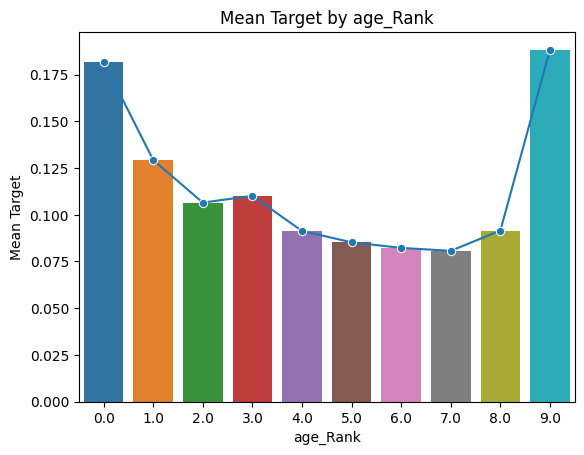

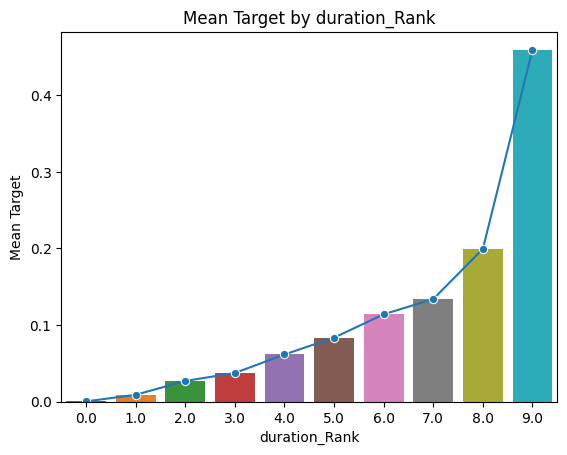

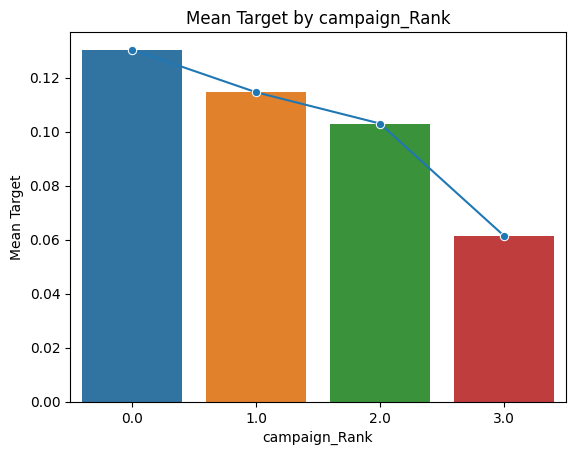

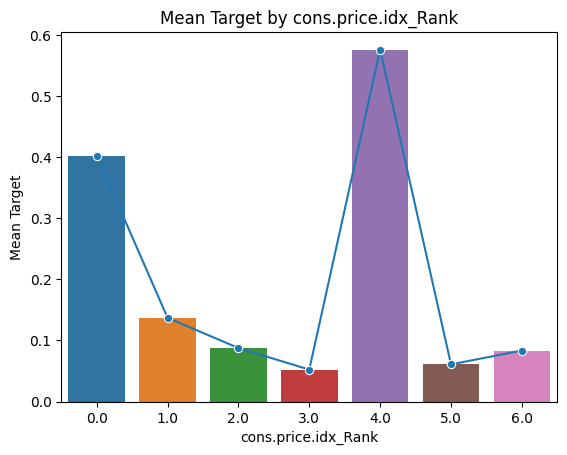

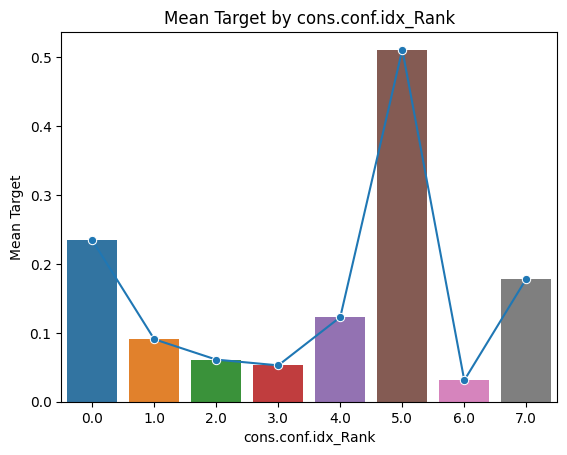

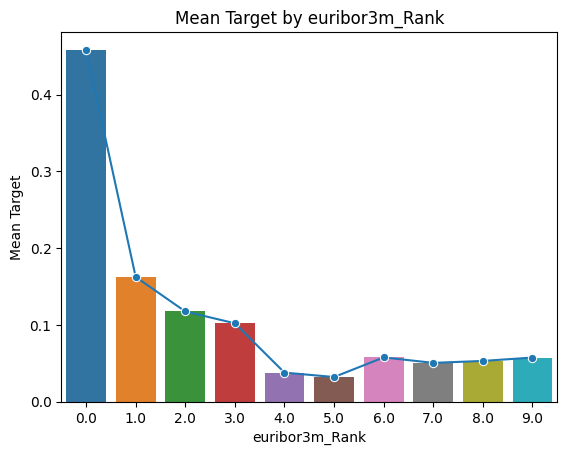

In [2841]:
# Looping over each column in the discretized numerical features dataframe (num_binned)
for col in (num_binned.columns):
    plt.figure()  # Create a new figure for each column
    
    # Calculate the mean target for each level of the current feature
    mean_target_per_level = X_bin_combined.groupby(col)['target'].mean().reset_index()
    
    # Plotting a lineplot to visualize the average target rate across different ranks of the current feature
    sns.lineplot(x=col, y='target', data=mean_target_per_level, marker='o')
    
    # Plotting a barplot to visualize the average target rate for each rank of the current feature
    # This helps us understand how the target variable varies across different levels (ranks) of the feature
    sns.barplot(x=col, y="target", data=mean_target_per_level, estimator=mean)
    
    plt.title(f'Mean Target by {col}')
    plt.ylabel('Mean Target')

# Displaying the plots
plt.show()


#### Observations:

### 1. **age_Rank**
   - The plot suggests that age is not a good predictor because it follows a U-curve relationship with the target variable.
   - **Justification:** Features exhibiting a U-shaped relationship often lack predictive power as they do not provide clear insights into the target variable's behavior. In this case, both younger and older individuals may exhibit different behaviors compared to those in mid-age, leading to ambiguity in prediction.

#### Explanation:

The observation states that the 'age_Rank' feature is not a good predictor because it exhibits a U-curve relationship. Let's break down what this means:

#### U-curve Relationship:
Imagine plotting the average response rate (or any relevant metric) against different age groups. Instead of a straight line or a clear trend, the plot forms a U-shaped curve. Here's why:

- **Younger Individuals:** People in their younger years (let's say, below 30) might have different financial priorities or spending habits. They could be more focused on education, career building, or short-term goals.
  
- **Mid-Age Individuals:** Now, consider those in their middle ages (between 30 and 50). They might have stable careers, families, and more diverse financial responsibilities, leading to a different response pattern to marketing campaigns.
  
- **Older Individuals:** Finally, individuals above a certain age (let's say, over 50) may have different needs and priorities again, such as retirement planning, investments, or health care.

#### Why it's Not a Good Predictor:
When we observe a U-curve relationship between age and the target variable (like response rate), it indicates that age alone doesn't provide a clear indication of how someone will respond to a marketing campaign. 

- **Ambiguity in Prediction:** Since people from different age groups respond differently, predicting their response solely based on age becomes ambiguous. **We cannot confidently say how an individual will behave based solely on their age because the relationship between age and response rate is not consistent across all age groups.**

#### Conclusion:
In practical terms, this means that age alone might not be the most reliable factor for predicting campaign success. Instead, we might need to consider other variables that better capture the nuances of customer behavior across different age groups.

### 2. **duration_Rank**
   - The plot suggests that duration is a great predictor as it exhibits significant discrimination across all rank levels.
   - **Justification:** Higher duration values likely indicate deeper engagement or interest, resulting in higher conversion rates. The clear discrimination across rank levels suggests that duration provides valuable information for predicting the target variable.
   - **Implication for Prediction:** Features with significant discrimination across different levels are valuable for predictive modeling as they provide clear insights into the target variable's behavior. In this case, duration serves as a strong predictor due to its ability to differentiate between different levels of engagement.

#### Conclusion:
Given its significant discrimination across all rank levels, the 'duration_Rank' feature should be retained for further analysis and model building.

### 3. **campaign_Rank**
   - The plot suggests that 'campaign' is not a bad predictor.
   - **Justification:** Although the plot does not show strong discrimination across rank levels, the logical relationship between the number of contacts(no of time contacted durring campaign so its inversely proportional less time contacted high conversion rate) and conversion rates suggests that the 'campaign' feature still provides useful information for prediction. Further analysis may be needed to determine its precise impact.
 - **Campaign Contacts vs. Conversion Rates:** Intuitively, one might expect that the number of times a person is contacted could influence their likelihood of conversion. For example, too many contacts may lead to annoyance or fatigue, while fewer contacts may not provide sufficient engagement.

#### Conclusion:
Given the logical relationship between campaign contacts and conversion rates, the 'campaign_Rank' feature should be retained for further analysis to explore its predictive potential fully.

### 4. **cons.price.idx_Rank**
   - The plot suggests that 'cons.price.idx' is a good predictor because it exhibits a non-linear relationship with the target variable.
   - **Justification:** The non-linear behavior observed in the plot indicates that the consumer price index may have varying effects on the target variable at different levels.    This feature provides valuable insights into customer behavior and should be retained for predictive modeling.

#### Non-Linear Relationship:
The plot reveals a non-linear relationship between the consumer price index and the target variable. Instead of following a straight line, the relationship exhibits curvature, indicating that the effect of the consumer price index on the target variable varies across different levels.

- **Interpretation:** This non-linear behavior suggests that the consumer price index has a nuanced impact on customer behavior. For example, changes in the consumer price index may affect purchasing decisions differently based on the current economic conditions or consumer sentiment.

#### Implication for Prediction:
Features with non-linear relationships provide valuable insights for predictive modeling, especially for machine learning algorithms like decision trees. These algorithms can effectively capture the complex interactions and non-linearities present in the data, making such features essential for accurate predictions.

#### Conclusion:
Given its non-linear relationship with the target variable, the 'cons.price.idx_Rank' feature should be retained for further analysis and model building to leverage its predictive potential fully.

### 5. **cons.conf.idx_Rank**
   - The plot suggests that 'cons.conf.idx' is a potentially useful predictor due to its similarity with the consumer price index.
   - **Justification:** The similarity in behavior with the consumer price index suggests that 'cons.conf.idx' also influences the target variable's behavior. Both features may capture different aspects of consumer sentiment, making them valuable predictors for understanding customer behavior.

#### Explanation:

The observation indicates that the 'cons.conf.idx_Rank' feature is a potentially useful predictor due to its similarity with the consumer price index. Let's explore this observation further:

#### Similarity with Consumer Price Index:
The plot reveals that the behavior of 'cons.conf.idx' is similar to that of the consumer price index. Both features exhibit non-linear relationships with the target variable, indicating that they may capture different aspects of consumer sentiment or economic conditions.

- **Interpretation:** Like the consumer price index, changes in consumer confidence levels (as captured by 'cons.conf.idx') may influence purchasing decisions, investment behaviors, or overall consumer sentiment, thereby impacting the target variable.

#### Implication for Prediction:
Features that capture different facets of consumer behavior or economic conditions provide valuable information for predictive modeling. By including both 'cons.price.idx' and 'cons.conf.idx' in the analysis, we can gain a more comprehensive understanding of customer behavior and improve prediction accuracy.

#### Conclusion:
Given its similarity to the consumer price index and its potential to capture different aspects of consumer sentiment, the 'cons.conf.idx_Rank' feature should be retained for further analysis and model building to leverage its predictive power fully.

### 6. **euribor3m_Rank**
   - The plot suggests that 'euribor3m' is a good predictor due to its inverse relationship with the target variable.
   - **Justification:** The inverse relationship between interest rates and target rates aligns with economic intuition. Lower interest rates typically stimulate borrowing and spending, leading to higher conversion rates for the bank. This feature provides valuable insights into customer behavior and should be retained for predictive modeling.

#### Inverse Relationship with Interest Rates:
The plot demonstrates that as the 'euribor3m' (Euro Interbank Offered Rate) decreases, the target variable's rate increases, and vice versa. This inverse relationship aligns with economic intuition:

- **Lower Interest Rates:** When interest rates are low, borrowing becomes cheaper, encouraging consumers to take out loans, make purchases, or invest. This increased economic activity often leads to higher conversion rates for the bank's products or services.

- **Higher Interest Rates:** Conversely, when interest rates are high, borrowing becomes more expensive, dampening consumer spending and investment, resulting in lower conversion rates.

#### Implication for Prediction:
Features that capture economic indicators, such as interest rates, provide valuable insights into consumer behavior and market dynamics. By including 'euribor3m' in the analysis, we can better understand how changes in interest rates affect customer behavior and improve prediction accuracy.

#### Conclusion:
Given its inverse relationship with interest rates and its ability to provide insights into consumer behavior, the 'euribor3m_Rank' feature should be retained for further analysis and model building to maximize its predictive potential.


In [2842]:
# as per visualization age will not help us to prdict pattern hence will drop 

num_1 = num_1.drop('age', axis=1)


In [2843]:
num_1.head(2)

,duration,campaign,cons.price.idx,cons.conf.idx,euribor3m
0,261.0,1,93.994,-36.4,4.857
1,149.0,1,93.994,-36.4,4.857


In [2844]:
# After dropping 'age'columns, we keep the remaining features due to their good discrimination power.

select_features_num = num_1
select_features_num.shape  # Output: (41188, 6)

select_features_num = num_1

In [2845]:
select_features_num.shape

(41188, 5)

In [2846]:
select_features_num.head(2)

,duration,campaign,cons.price.idx,cons.conf.idx,euribor3m
0,261.0,1,93.994,-36.4,4.857
1,149.0,1,93.994,-36.4,4.857


### Feature Selection: Categorical Features

####  Bivariate analysis of categorical features

**Purpose:**
To understand how categorical features influence the target variable.

We start by examining the initial structure of our categorical columns to understand what we're working with.

In [2847]:
categorical_columns.head(2)

,job,marital,education,default,housing,loan,contact,month,day_of_week,pdays,poutcome,previous,emp.var.rate,nr.employed
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,No,nonexistent,0,1.1,5191.0
1,services,married,high.school,unknown,no,no,telephone,may,mon,No,nonexistent,0,1.1,5191.0


In [2848]:
#np.unique(categorical_columns['emp.var.rate'])


- By concatenating the target variable (Y) and the categorical features (categorical_columns) into a single DataFrame (X_cat_combined), we create a unified dataset that enables us to perform exploratory data analysis, preprocessing, and model building more efficiently. 
- It ensures that the target variable aligns correctly with the corresponding categorical features for each instance in the dataset.

In [2849]:
X_cat_combined = pd.concat([Y, categorical_columns], axis=1, join='inner')
X_cat_combined.head()

,target,job,marital,education,default,housing,loan,contact,month,day_of_week,pdays,poutcome,previous,emp.var.rate,nr.employed
0,0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,No,nonexistent,0,1.1,5191.0
1,0,services,married,high.school,unknown,no,no,telephone,may,mon,No,nonexistent,0,1.1,5191.0
2,0,services,married,high.school,no,yes,no,telephone,may,mon,No,nonexistent,0,1.1,5191.0
3,0,admin.,married,basic.6y,no,no,no,telephone,may,mon,No,nonexistent,0,1.1,5191.0
4,0,services,married,high.school,no,no,yes,telephone,may,mon,No,nonexistent,0,1.1,5191.0


#### Understanding the Bar Plot for Categorical Features

##### Purpose
The bar plot helps visualize the average value of the target variable for each category of the categorical feature, helping us understand the influence of different categories on the target variable.

## Explanation

1. **X-Axis (Categories of 'education')**: Each bar on the x-axis represents a different category within the 'education' feature.
2. **Y-Axis (Mean Target)**: The y-axis shows the average value of the target variable for each category. The target variable is binary (0 or 1), indicating whether the campaign was successful or not.
3. **Bar Heights**: The height of each bar represents the mean target value for that category, which is the proportion of successful campaigns in that category.

## Example with 'education' Feature

| education           | target | count | mean (y-axis) |
|---------------------|--------|-------|---------------|
| Basic               | 0/1    | 12513 | 0.087         |
| high.school         | 0/1    | 9515  | 0.108         |
| professional.course | 0/1    | 5243  | 0.113         |
| university.degree   | 0/1    | 12168 | 0.137         |
| unknown             | 0/1    | 1749  | 0.146         |

## Interpretation of the Bar Plot

- **Basic**: Mean target value is approximately 0.087 (8.7% success rate).
- **high.school**: Mean target value is approximately 0.108 (10.8% success rate).
- **professional.course**: Mean target value is approximately 0.113 (11.3% success rate).
- **university.degree**: Mean target value is approximately 0.137 (13.7% success rate).
- **unknown**: Mean target value is approximately 0.146 (14.6% success rate).

## What the Plot Shows

The plot helps visualize how likely individuals from each education category are to respond positively to the campaign.

## Conclusion from the Plot

- **Higher Response Rates**: Categories like 'university.degree' and 'unknown' have higher response rates.
- **Lower Response Rates**: Categories like 'Basic' have lower response rates.

This analysis helps decide whether to keep or drop the 'education' feature in the model.


In [2850]:
# Function to plot mean target by categorical feature

def plot_mean_target(feature, data, figsize=(10, 6)):
    plt.figure(figsize=figsize)
    
    # Bar plot for mean target
    sns.barplot(x=feature, y='target', data=data, estimator=np.mean)
    
    # Line plot for mean target
    sns.lineplot(x=feature, y='target', data=data, estimator=np.mean, marker='o', label='Mean Target')
    
    # Labels and title
    plt.xlabel(f'{feature}')
    plt.ylabel('Mean Target')
    plt.title(f'Mean Target by {feature} Level')
    plt.legend()
    plt.tight_layout()
    plt.show()

### Feature 1: Education:
#### Purpose:

The goal here is to streamline the education categories for better analysis and interpretation. This involves combining similar education levels and addressing outliers like "illiterate" to improve the overall discriminatory power of the variable.

#### Insights/Actions:

#### Initial Analysis:

- The education categories include varying levels of basic education (9 years, 6 years, 4 years) and other levels such as high school, professional courses, university degree, and unknown.
- The "illiterate" category captures approximately 20% of responders, which may not provide meaningful insights due to its disproportionately high response rate.

#### Data Manipulation:

- Combine similar basic education levels (9 years, 6 years, 4 years) into a single category labeled "Basic".
- Merge the "illiterate" category into "unknown" to mitigate its disproportionate impact on the analysis.

#### Bivariate Analysis:

- Will group the data by education level and calculate the mean target variable for each category to assess discrimination.
- The initial grouping shows different response rates across education levels.

#### Visualization:

- Utilize a bar plot to visually represent the relationship between education and the target variable.
- The plot helps visualize the discriminatory power of education levels in predicting the target variable.

#### Conclusion:

After grouping basic education levels and handling outliers, the discriminatory power of the education variable improves bit little but still it is flat not linear.

#### Decision: 
Education is kind of flat only doesnt make sense to keep it in model hence will **drop**


In [2851]:
X_cat_combined.groupby('education')['target'].agg(['mean'])

,mean
education,
basic.4y,0.102490
basic.6y,0.082024
basic.9y,0.078246
high.school,0.108355
illiterate,0.222222
professional.course,0.113485
university.degree,0.137245
unknown,0.145003


In [2852]:
X_cat_combined['education'] = np.where(X_cat_combined['education'] == 'basic.9y', 'Basic', X_cat_combined['education'])
X_cat_combined['education'] = np.where(X_cat_combined['education'] == 'basic.6y', 'Basic', X_cat_combined['education'])
X_cat_combined['education'] = np.where(X_cat_combined['education'] == 'basic.4y', 'Basic', X_cat_combined['education'])
X_cat_combined['education'] = np.where(X_cat_combined['education'] == 'illiterate', 'unknown', X_cat_combined['education'])


In [2853]:
X_cat_combined.groupby('education')['target'].agg(['mean'])

,mean
education,
Basic,0.087029
high.school,0.108355
professional.course,0.113485
university.degree,0.137245
unknown,0.145798


In [2854]:
# X_cat_combined['education'].value_counts(normalize=True)

In [2855]:
# X_cat_combined.shape

In [2856]:
# pd.crosstab(X_cat_combined['education'], X_cat_combined['target'])

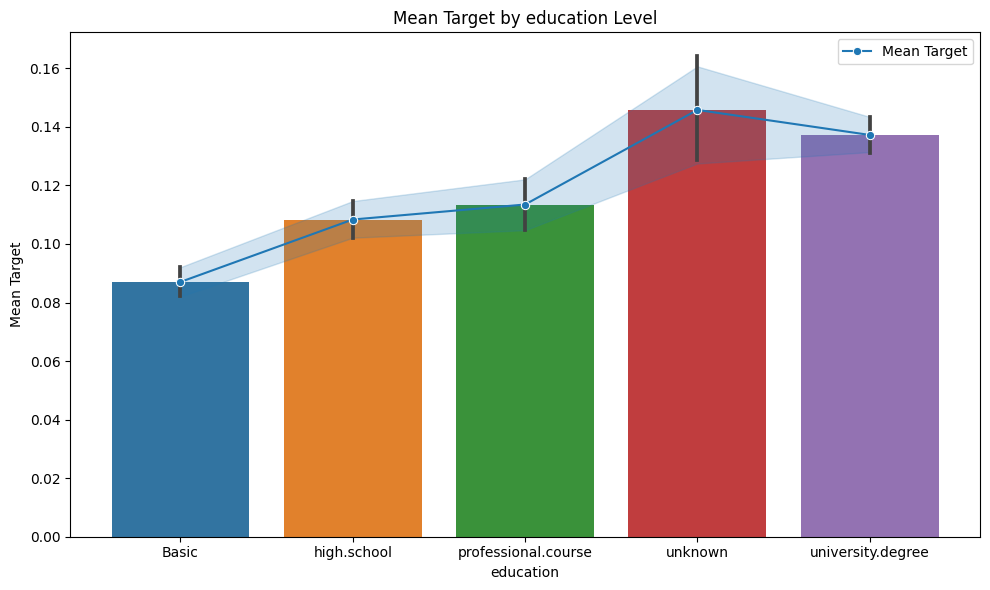

In [2857]:
plot_mean_target('education', X_cat_combined)


### Feature 2: Job:
#### Purpose:

Let's delve into how different job categories influence our target variable. We aim to uncover which jobs have a stronger impact on our prediction and whether there are any irregularities in the data.

#### Insights/Actions:

#### Initial Analysis:

When we initially look at the job categories, we notice that some are much more common than others. This could affect how well they predict our target variable.

#### Data Manipulation:

We'll address missing or unspecified job categories by replacing the "unknown" job category with "unemployed".

#### Bivariate Analysis:

Grouping the data by job category and calculating the mean target variable for each category helps us see which jobs have the highest and lowest response rates. This gives us insight into which jobs might be more influential in our predictions.

#### Visualization:

To get a clearer picture, let's use a bar plot to visualize how each job category relates to our target variable. This will make it easier to spot any trends or patterns in the data.

#### Conclusion:

Some job categories seem to have a stronger influence on our prediction than others, especially those with lower frequencies.

#### Decision: 
We'll likely keep the job categories in our model, but we need to be aware of how low-frequency categories might disproportionately affect our predictions.


In [2858]:
X_cat_combined['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

**Frequency Distribution:**

    Each job category is listed along with the count of occurrences in the dataset.
    
    For example, "admin." appears 10,422 times, "blue-collar" appears 9,254 times, and so on.

In [2859]:
# Replace 'unknown' values in the 'job' column with 'unemployed'; otherwise, keep the original value.

X_cat_combined['job']=np.where(X_cat_combined['job'] == 'unknown', 'unemployed', X_cat_combined['job'])

X_cat_combined.groupby('job')['target'].agg(['mean']).sort_values(by='mean')
 # did groupby so mean of 0 will be 0 so mean of 1 i.e those whio subscribes will get

,mean
job,
blue-collar,0.068943
services,0.081381
entrepreneur,0.085165
housemaid,0.100000
self-employed,0.104856
technician,0.108260
management,0.112175
admin.,0.129726
unemployed,0.134673


- So, after we've manipulated the data (in this case, replacing 'unknown' job categories with 'unemployed'), we group the data by job category. 
- Then, for each job category, we calculate the average target variable value. 
- This gives us a sense of the response rate or how likely individuals in each job category are to subscribe to the service.

**For example**, the mean target variable value for individuals with an "admin." job is 0.129726, which means that, on average, about 13% of individuals with an admin job are likely to subscribe. Similarly, for "blue-collar" jobs, the mean target variable value is 0.068943, indicating that about 6.9% of individuals with blue-collar jobs are likely to subscribe.

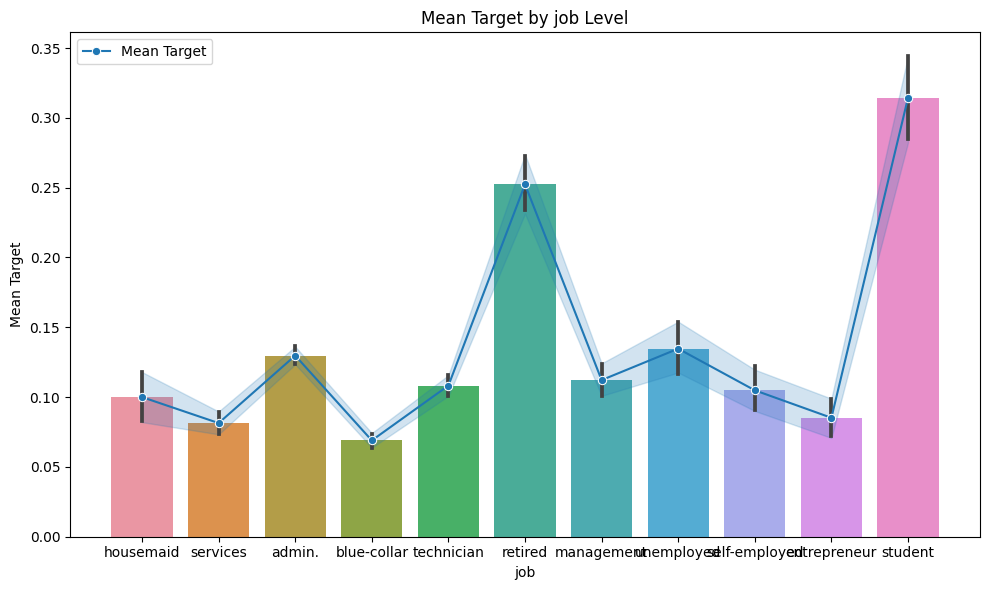

In [2860]:
plot_mean_target('job', X_cat_combined)



**Let's consider two job categories: "student" and "blue-collar", and examine their response rates in our dataset:**

Student Category:

Frequency: 875 occurrences\
Response Rate: 31.43%

Blue-collar Category:

Frequency: 9,254 occurrences\
Response Rate: 6.89%
"""

#### Now, let's break down the observation and explain the Denominator Effect:

**Observation:** The "student" category, despite its low frequency, exhibits a much higher response rate compared to the "blue-collar" category, which is more common but has a lower response rate.

**Explanation of Denominator Effect:**

The Denominator Effect refers to situations where low-frequency categories may seem to have higher predictive power simply because they have fewer instances, leading to a higher event rate.
In our example, the "student" category's high response rate could be a result of chance or noise in the data due to its low frequency. This phenomenon can mislead us into believing that the "student" category is a stronger predictor when, in fact, it might not hold true in a larger dataset.
In summary, while the "student" category appears to be a strong predictor based on its high response rate, we need to be cautious of the Denominator Effect. It's essential to monitor such discrepancies and assess whether they hold true in larger datasets or if they are merely chance occurrences.
"""

#### *Response Rate:* 
        This is just a fancy way of saying how often something happens. For example, if you ask 100 people if they like ice cream, and 30 say yes, then the response rate for liking ice cream is 30%.

#### *Higher Predictive Power:*
        This means how good something is at telling us what might happen. Imagine you have a friend who always wears a red hat when it rains. So, if you see your friend with a red hat, you might predict it's going to rain. The red hat in this example has a high predictive power for rain.


### Feature 3: Day of Week:


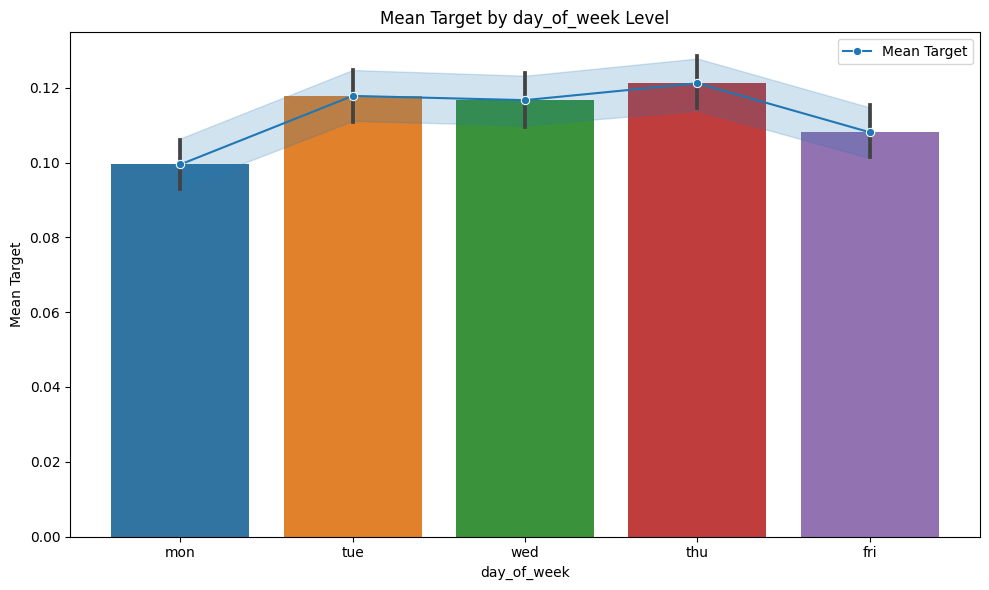

In [2861]:

plot_mean_target('day_of_week', X_cat_combined)


#### Purpose:

Evaluate the discriminatory power of the day of the week variable in predicting the target variable.

#### Insights/Actions:

#### Initial Analysis:

- Day of the week does not show significant discrimination in predicting the target variable.
- There is no clear pattern indicating different response rates across days of the week.

#### Conclusion:

Day of the week does not provide meaningful discriminatory power in predicting the target variable.

#### Decision: 

**Drop** the day of the week variable from the model as it does not contribute to predictive accuracy.


### Feature 4: Marital:


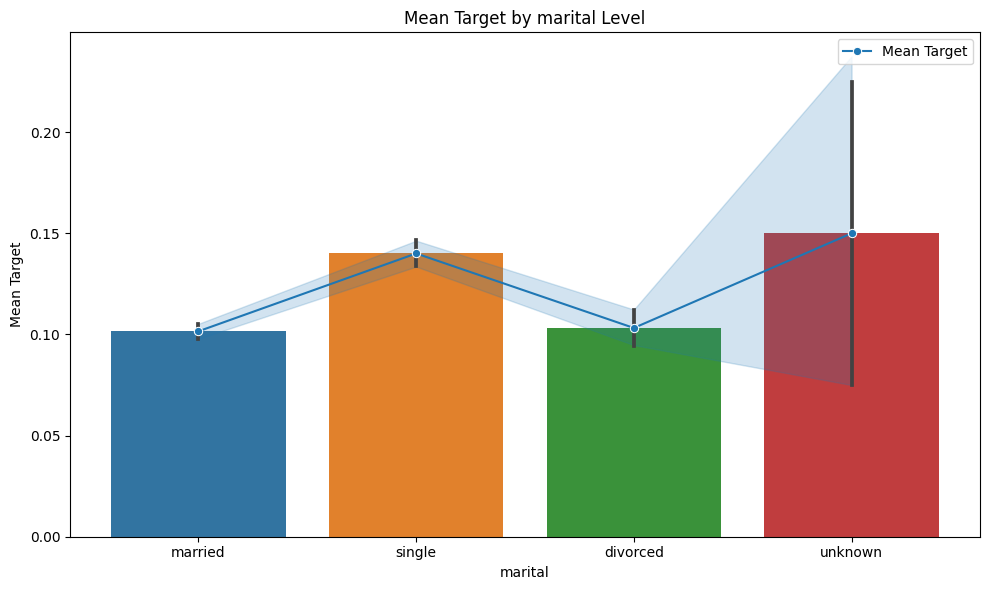

In [2862]:

plot_mean_target('marital', X_cat_combined)


#### Insights/Actions:

#### Initial Analysis:

- Marital status does not exhibit significant discrimination in predicting the target variable.
- There is no clear pattern indicating different response rates across marital status categories.

#### Conclusion:

Marital status does not provide meaningful discriminatory power in predicting the target variable.

#### Decision:

**Drop** the marital status variable from the model as it does not contribute to predictive accuracy.


### Feature 5: Housing:


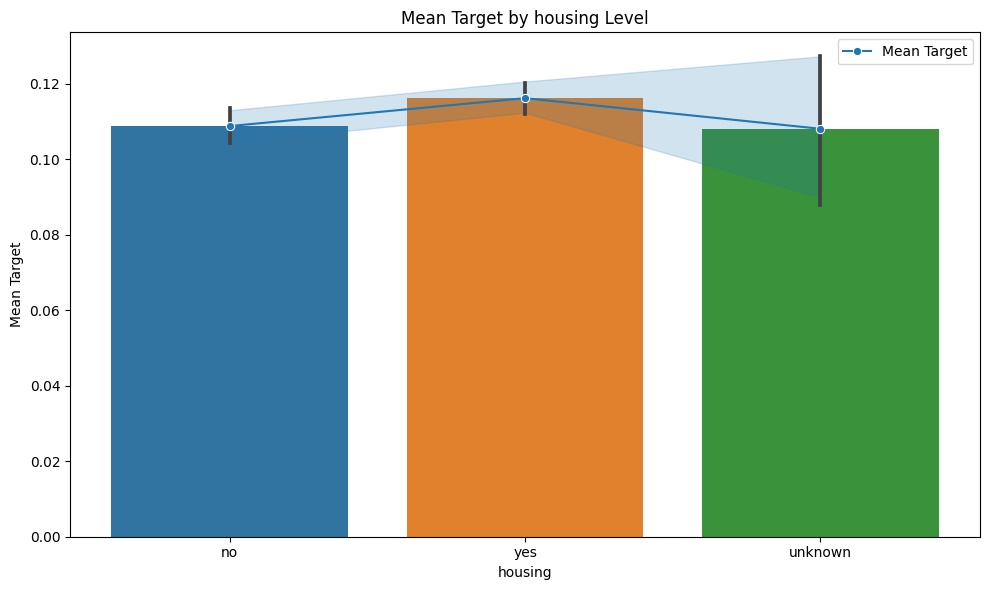

In [2863]:

plot_mean_target('housing', X_cat_combined)


#### Initial Analysis:

- Housing status does not show significant discrimination in predicting the target variable.
- There is no clear pattern indicating different response rates across housing categories.

#### Conclusion:

Housing status does not provide meaningful discriminatory power in predicting the target variable.

#### Decision: 

**Drop** the housing variable from the model as it does not contribute to predictive accuracy.


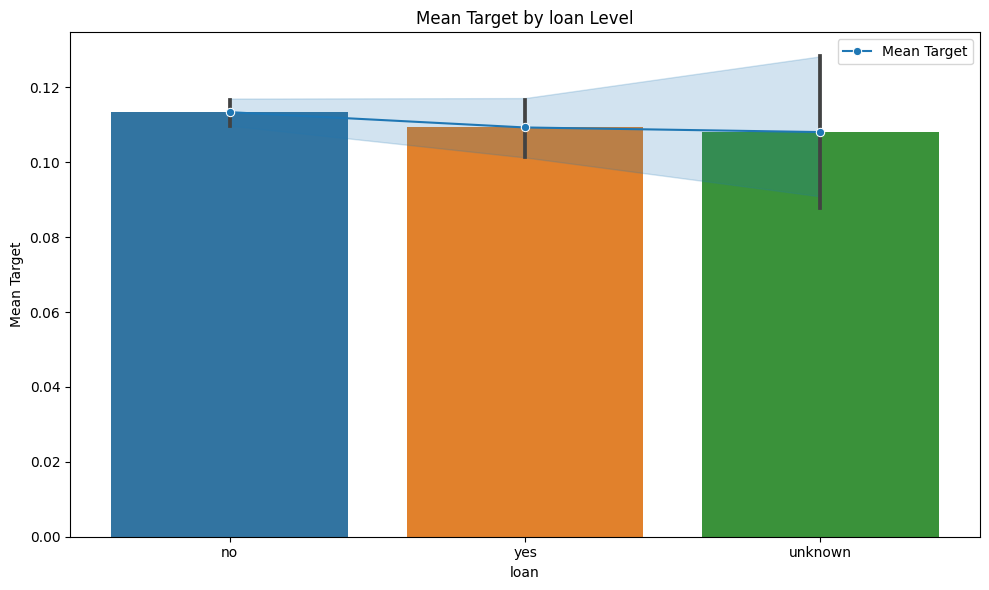

In [2864]:
plot_mean_target('loan', X_cat_combined)


### Feature 6: Default:


In [2865]:
X_cat_combined['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

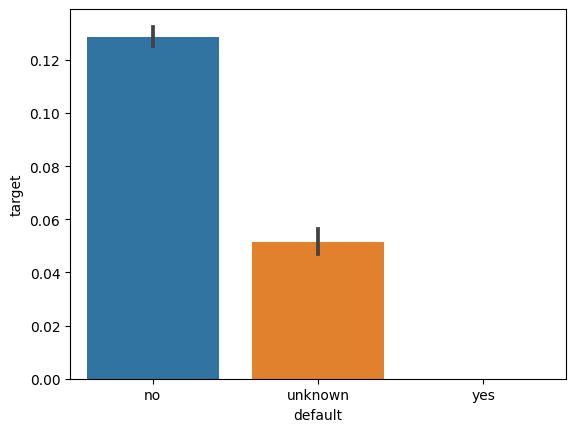

In [2866]:
ax = sns.barplot(x='default', y = 'target', data=X_cat_combined, estimator = mean)


In [2867]:
X_cat_combined['default']=np.where(X_cat_combined['default']=='unknown','yes',X_cat_combined['default'])
X_cat_combined.groupby('default')['target'].agg(['mean'])

,mean
default,
no,0.128790
yes,0.051512


In [2868]:
X_cat_combined['default'] = np.where(X_cat_combined['default']=='unknown','yes',X_cat_combined['default'])
X_cat_combined['default'].value_counts()

no     32588
yes     8600
Name: default, dtype: int64

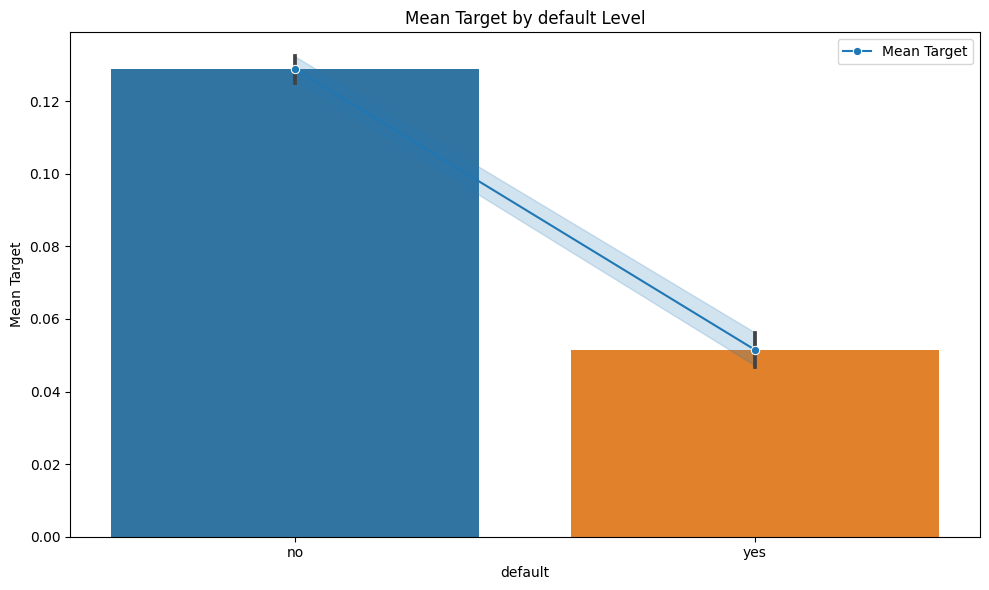

In [2869]:

plot_mean_target('default', X_cat_combined)


Based on the provided output, it seems that there are three categories in the "default" variable: "no", "unknown", and "yes". Initially, there is no clear discriminatory power observed among these categories. However, after treating the "unknown" category by assuming that individuals with unknown default status actually have default status, there is a noticeable difference in the mean target variable between the "no" and "yes" categories.

From the bar plot, it's evident that individuals categorized as "yes" for default have a significantly lower mean target variable compared to those categorized as "no". This suggests that default status might indeed have some discriminatory power in predicting the target variable, especially after treating the "unknown" category.

So, considering this improvement in discriminatory power after treatment, it might be beneficial to retain the "default" variable in the model to assess its impact further.


### Feature 7: Contact Level:


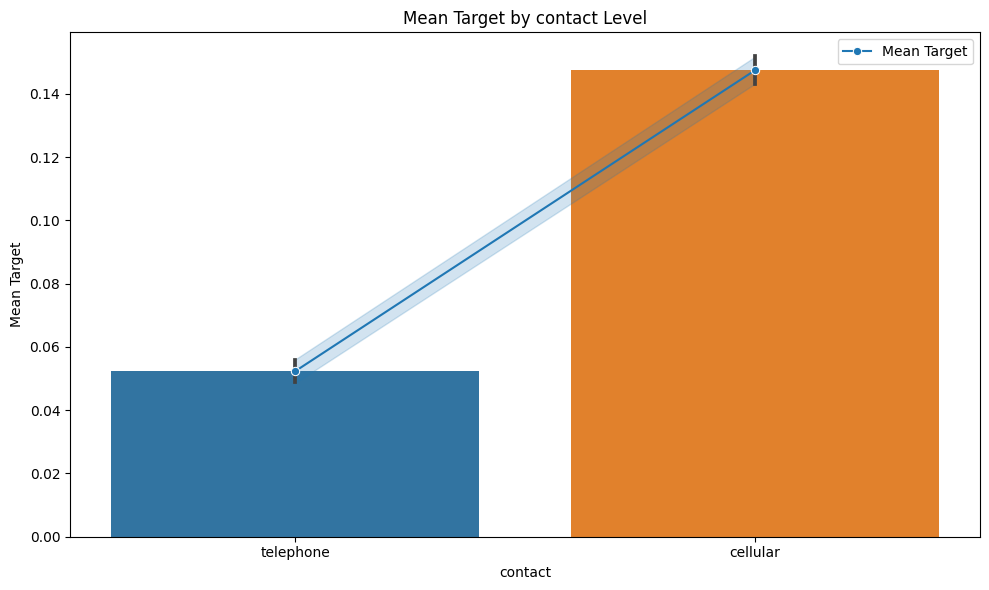

Contact does discriminate the target variable will keep


In [2870]:
plot_mean_target('contact', X_cat_combined)
print('Contact does discriminate the target variable will keep')


### Feature 8: Month:


### Month
#### Purpose:

The objective here is to streamline the month variable by combining months into half-yearly intervals (H1 and H2) to facilitate analysis and interpretation. This categorization aims to identify any seasonal patterns or trends that may influence the target variable.

#### Insights/Actions:

#### Initial Analysis:

- The month variable contains different months with varying frequencies.
- There seems to be some discrimination observed among certain months, indicating potential seasonal effects on the target variable.

#### Data Manipulation:

- Combine months into two half-yearly intervals, H1 (January to June) and H2 (July to December), to simplify the analysis and capture any seasonal patterns.
- Assign any months not falling into H1 or H2 as "Unknown" to handle outliers.

#### Bivariate Analysis:

- Group the data by the newly created H1_H2 intervals and calculate the mean target variable for each interval to assess discrimination.
- The analysis reveals some discrimination between H1 and H2 intervals, albeit not significant.

#### Conclusion:

After categorizing months into half-yearly intervals, some discrimination is observed between the intervals. However, the discriminatory power is not substantial, with only a slight difference in subscription likelihood between H1 and H2.

#### Decision: Retain the month variable in the model to capture any potential seasonal effects on the target variable.


In [2871]:
X_cat_combined['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [2872]:
X_cat_combined['H1_H2'] = np.where(X_cat_combined['month'].isin(['jan','feb','mar','apr','may','jun']), 'H1',
                             np.where(X_cat_combined['month'].isin(['jul','aug','sep','oct','nov','dec']), 'H2',
                                      'Unknown'))
X_cat_combined['H1_H2'].value_counts()

H1    22265
H2    18923
Name: H1_H2, dtype: int64

In [2873]:
X_cat_combined.groupby('H1_H2')['target'].agg(['mean'])

,mean
H1_H2,
H1,0.101505
H2,0.125773



#### Bivariate Analysis:

- Mean target variables were calculated for each interval:
  - "H1" (January to June) exhibits a mean target variable of approximately 10.15%.
  - "H2" (July to December) demonstrates a mean target variable of roughly 12.58%.
- The analysis indicates some discrimination between the two intervals, suggesting potential seasonal effects on the target variable.




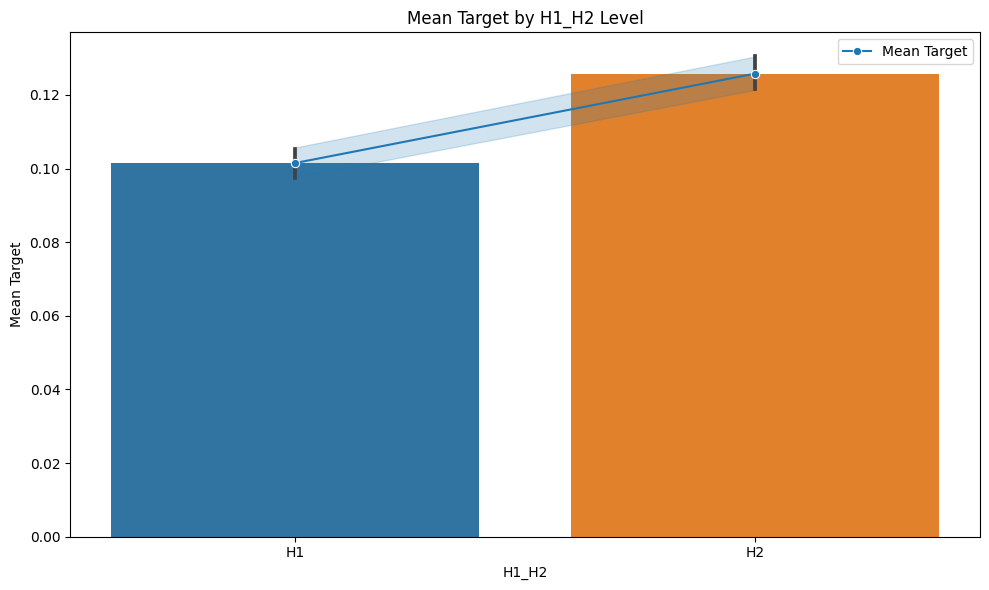

In [2874]:

plot_mean_target('H1_H2', X_cat_combined)


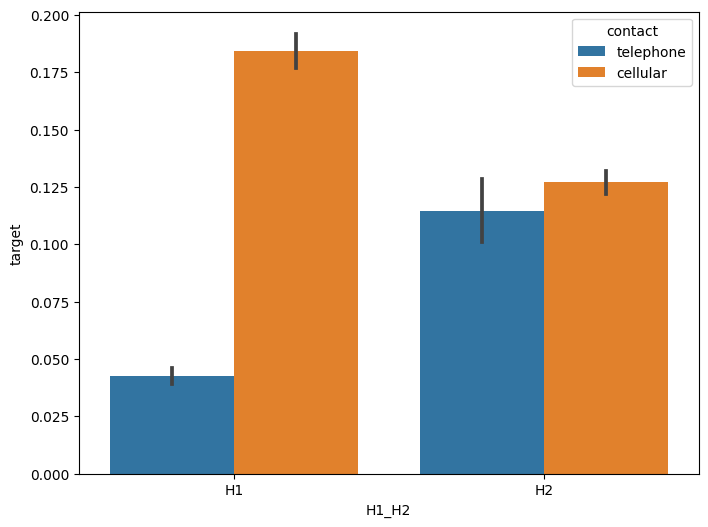

In [2875]:
plt.figure(figsize=(8, 6))

ax = sns.barplot(x='H1_H2', y = 'target', hue='contact', data=X_cat_combined, estimator = mean)


##### Observation:
People contacted during H1 of the year who have cellular connection are more likely to subscribe

### Feature 9: Previous:
#### What's the "Previous" Column?

This column shows how many times a person was contacted before this current marketing campaign.

#### What Does the Analysis Show?

When people were contacted more times before, they were more likely to respond positively to the campaign.
For example, when they were contacted once, the chance of a positive response increased a lot. When contacted more times, the chances kept going up.

#### How Many People Were Contacted Before?

Most people (around 90%) were not contacted before at all. Only a few were contacted multiple times.

#### What's the Plan?

We want to group or "bin" these contacts into categories to make it easier for the computer to understand.
We'll put people who were not contacted in one group, those contacted once in another, and so on.
Then, we'll turn these groups into numbers the computer can use in our analysis.

#### How Do We Do It?

First, we decide on the groups, like people not contacted, contacted once, contacted twice, and so on.
Then, we tell the computer to put each person into one of these groups based on how many times they were contacted.
After that, we'll make the groups into something the computer can understand better, like "1" for people contacted once and "0" for people not contacted.

#### Why Do We Do It?

By putting people into groups, we make it easier for the computer to see the patterns. It helps it understand better who's more likely to respond to the campaign.
Plus, it helps us avoid confusing the computer by making sure the groups don't overlap too much.

#### What's Next?

Once we've sorted everyone into groups and made the data ready for the computer, we can use it to make predictions. We'll have a better idea of who's likely to respond well to the marketing campaign.


In [2876]:
X_cat_combined.groupby('previous')['target'].agg(['mean'])

,mean
previous,
0,0.088322
1,0.212015
2,0.464191
3,0.592593
4,0.542857
5,0.722222
6,0.600000
7,0.000000


In [2877]:
X_cat_combined['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

## Encoding Categorical Variables into Dummy Variables for Machine Learning


#### I want to organize these numbers into groups to understand them better. That's what bins helps us do.

`[-1, 0, 1, 2, 3, 4, 5, 6, np.inf]`: Think of this as creating boxes to put these numbers in.
- **-1**: This is a box for any numbers smaller than -1. It's like a box for any really strange or impossible numbers.
- **0**: This box is for numbers that are 0 or bigger but less than 1, meaning you've never contacted them before.
- **1**: This box is for numbers that are 1 or bigger but less than 2, meaning you've contacted them once.
- **2**: This box is for numbers that are 2 or bigger but less than 3, meaning you've contacted them twice, and so on.
- **np.inf**: This special symbol means "infinity." It's like having a special box for numbers that are really huge, like 7 or more.

So, `bins` is just a way to group your contact numbers into different categories, helping you understand how many times you've contacted clients in a simpler way.


In [2878]:
# Define the bins for previous contacts
bins = [-1, 0, 1, 2, 3, 4, 5, 6, np.inf]

# Define labels for each bin
labels = ['Not Contacted', 'Contacted Once', 'Contacted Twice', 'Contacted Thrice',
          'Contacted Four Times', 'Contacted Five Times', 'Contacted Six Times', 'Contacted Seven or More Times']

# Create a new column with the bins
X_cat_combined['previous_bins'] = pd.cut(X_cat_combined['previous'], bins=bins, labels=labels)

# Display the counts for each bin
print(X_cat_combined['previous_bins'].value_counts())

# Encode the bins into numerical values
X_cat_combined['previous_encoded'] = X_cat_combined['previous_bins'].astype('category').cat.codes

print('\n')
# Show the encoded values
print(X_cat_combined[['previous', 'previous_bins', 'previous_encoded']].head())


Not Contacted                    35563
Contacted Once                    4561
Contacted Twice                    754
Contacted Thrice                   216
Contacted Four Times                70
Contacted Five Times                18
Contacted Six Times                  5
Contacted Seven or More Times        1
Name: previous_bins, dtype: int64


   previous  previous_bins  previous_encoded
0         0  Not Contacted                 0
1         0  Not Contacted                 0
2         0  Not Contacted                 0
3         0  Not Contacted                 0
4         0  Not Contacted                 0


In [2879]:
X_cat_combined.drop(['previous', 'previous_encoded'], axis=1, inplace=True)


In [2880]:
X_cat_combined.head()

,target,job,marital,education,default,housing,loan,contact,month,day_of_week,pdays,poutcome,emp.var.rate,nr.employed,H1_H2,previous_bins
0,0,housemaid,married,Basic,no,no,no,telephone,may,mon,No,nonexistent,1.1,5191.0,H1,Not Contacted
1,0,services,married,high.school,yes,no,no,telephone,may,mon,No,nonexistent,1.1,5191.0,H1,Not Contacted
2,0,services,married,high.school,no,yes,no,telephone,may,mon,No,nonexistent,1.1,5191.0,H1,Not Contacted
3,0,admin.,married,Basic,no,no,no,telephone,may,mon,No,nonexistent,1.1,5191.0,H1,Not Contacted
4,0,services,married,high.school,no,no,yes,telephone,may,mon,No,nonexistent,1.1,5191.0,H1,Not Contacted


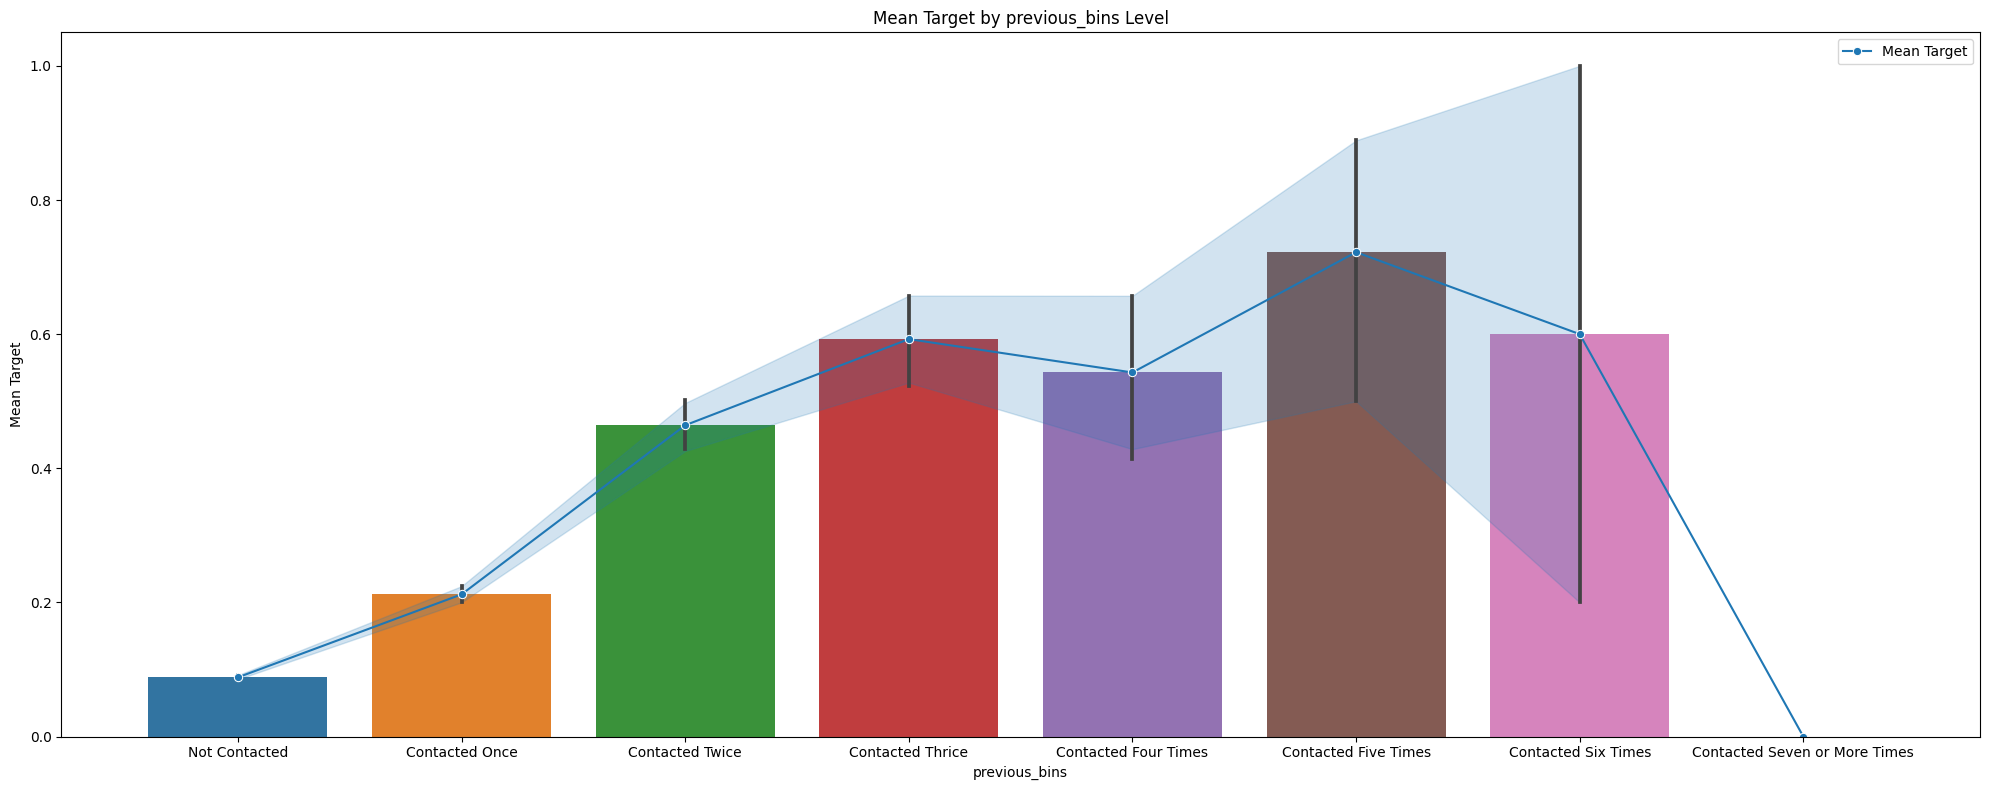

In [2881]:

plot_mean_target('previous_bins', X_cat_combined, figsize=(20, 8))


### Feature 10: Employment Variation Rate:

#### What's the "Employment Variation Rate" Column?

This column indicates the quarterly variation rate of employment in the country where the marketing campaign is conducted.

#### What Does the Analysis Show?

The analysis reveals that the employment variation rate has a significant impact on the response rate to the marketing campaign. Higher variation rates tend to correlate with higher positive response rates, while lower variation rates correlate with lower positive response rates.

#### How Many Different Employment Variation Rates Were Observed?

The employment variation rate spans a range of values, indicating different levels of economic fluctuation during the campaign period. The most common variation rates observed are around 1.4, -1.8, and 1.1.

#### What's the Plan?

We aim to categorize the employment variation rates into distinct groups or "bins" to simplify the data for analysis. This categorization will help us identify trends and patterns more easily.

#### How Do We Do It?

First, we define the groups based on the range of employment variation rates observed. Then, we assign each observation to one of these groups based on its variation rate. Finally, we encode these groups into numerical values to facilitate analysis.

#### Why Do We Do It?

Categorizing the employment variation rates allows us to discern patterns more effectively and aids in predicting the response to the marketing campaign. It ensures that the model can better understand the relationship between employment fluctuations and campaign outcomes.

#### What's Next?

Once we've categorized the employment variation rates and encoded them for analysis, we can proceed to build predictive models. These models will provide insights into how changes in employment rates impact the campaign's success.


In [2882]:
X_cat_combined.groupby('emp.var.rate')['target'].agg(['mean'])

,mean
emp.var.rate,
-3.4,0.423903
-3.0,0.511628
-2.9,0.357186
-1.8,0.159081
-1.7,0.521345
-1.1,0.474016
-0.2,0.100000
-0.1,0.062992
1.1,0.030916


In [2883]:
X_cat_combined['emp.var.rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

In [2884]:
# Define the bins for employment variation rate
emp_var_bins = [-np.inf, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, np.inf]

# Define labels for each bin
emp_var_labels = ['Very Low', 'Low', 'Moderate Low', 'Moderate', 'Moderate High', 
                  'High', 'Very High', 'Extremely High', 'Unspecified']

# Create a new column with the bins
X_cat_combined['emp.var.rate_bins'] = pd.cut(X_cat_combined['emp.var.rate'], bins=emp_var_bins, labels=emp_var_labels)

# Display the counts for each bin
print(X_cat_combined['emp.var.rate_bins'].value_counts())

# Dropping the 'emp.var.rate' column
X_cat_combined.drop(['emp.var.rate'], axis=1, inplace=True)




Unspecified       23997
Moderate High      9957
Extremely High     3693
Moderate Low       1663
Low                1243
High                635
Very Low              0
Moderate              0
Very High             0
Name: emp.var.rate_bins, dtype: int64


In [2885]:
X_cat_combined.head()

,target,job,marital,education,default,housing,loan,contact,month,day_of_week,pdays,poutcome,nr.employed,H1_H2,previous_bins,emp.var.rate_bins
0,0,housemaid,married,Basic,no,no,no,telephone,may,mon,No,nonexistent,5191.0,H1,Not Contacted,Unspecified
1,0,services,married,high.school,yes,no,no,telephone,may,mon,No,nonexistent,5191.0,H1,Not Contacted,Unspecified
2,0,services,married,high.school,no,yes,no,telephone,may,mon,No,nonexistent,5191.0,H1,Not Contacted,Unspecified
3,0,admin.,married,Basic,no,no,no,telephone,may,mon,No,nonexistent,5191.0,H1,Not Contacted,Unspecified
4,0,services,married,high.school,no,no,yes,telephone,may,mon,No,nonexistent,5191.0,H1,Not Contacted,Unspecified


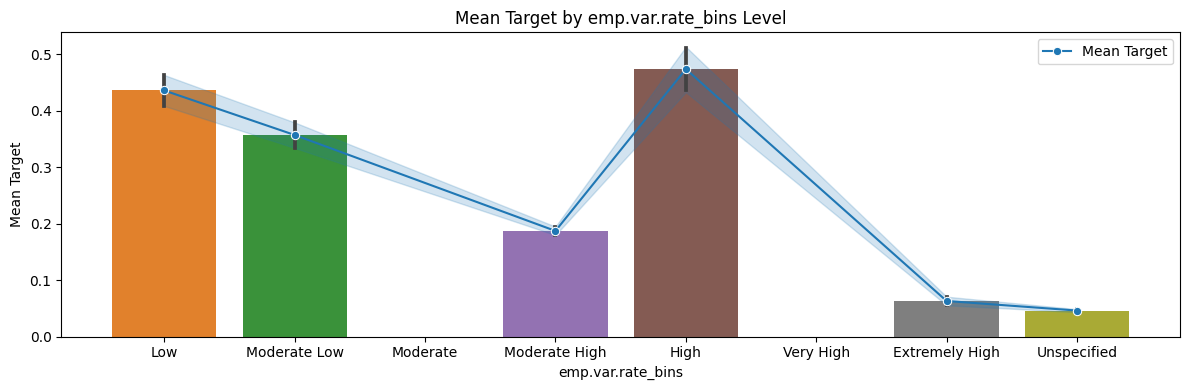

In [2886]:

plot_mean_target('emp.var.rate_bins', X_cat_combined, figsize=(12, 4))


### Feature 11: nr.employed:

#### Number of Employees

#### What's the "Number of Employees" Column?

This column represents the number of employees in the country where the marketing campaign is conducted.

#### What Does the Analysis Show?

The analysis indicates that the number of employees has a notable impact on the response rate to the marketing campaign. Higher numbers of employees tend to correlate with higher positive response rates, while lower numbers of employees correlate with lower positive response rates.

#### How Many Different Numbers of Employees Were Observed?

The number of employees varies across different observations, indicating differences in workforce size during the campaign period. The most common numbers of employees observed are around 5228.1, 5099.1, and 5191.0.

#### What's the Plan?

We intend to categorize the numbers of employees into distinct groups or "bins" to simplify the data for analysis. This categorization will assist in identifying trends and patterns more effectively.

#### How Do We Do It?

First, we define the groups based on the range of numbers of employees observed. Then, we assign each observation to one of these groups based on its number of employees. Finally, we encode these groups into numerical values to facilitate analysis.

#### Why Do We Do It?

Categorizing the numbers of employees allows us to discern patterns more effectively and aids in predicting the response to the marketing campaign. It ensures that the model can better understand the relationship between workforce size and campaign outcomes.

#### What's Next?

Once we've categorized the numbers of employees and encoded them for analysis, we can proceed to build predictive models. These models will provide insights into how changes in workforce size impact the campaign's success.


In [2887]:
X_cat_combined.groupby('nr.employed')['target'].agg(['mean'])

,mean
nr.employed,
4963.6,0.474016
4991.6,0.521345
5008.7,0.567692
5017.5,0.423903
5023.5,0.511628
5076.2,0.357186
5099.1,0.127959
5176.3,0.100000
5191.0,0.030916


In [2888]:
X_cat_combined['nr.employed'].value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

In [2889]:
# Define the bins for number of employees
bins = [4963.6, 4991.6, 5008.7, 5017.5, 5023.5, 5076.2, 5099.1, 5176.3, 5191.0, 5195.8, 5228.1, np.inf]

# Define labels for each bin
# Define labels for each bin
labels = ['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High-Medium', 
          'High', 'Very High-Low', 'Very High-Medium', 'Very High', 'Very High-High', 'Very High-Highest']

# Create a new column with the bins

# Create a new column with the bins
X_cat_combined['nr.employed_bins'] = pd.cut(X_cat_combined['nr.employed'], bins=bins, labels=labels)

# Display the counts for each bin
print(X_cat_combined['nr.employed_bins'].value_counts())
print('\n')

# Encode the bins into numerical values
X_cat_combined['nr.employed_encoded'] = X_cat_combined['nr.employed_bins'].astype('category').cat.codes

# Show the encoded values
X_cat_combined[['nr.employed', 'nr.employed_bins', 'nr.employed_encoded']].head()


Very High-High       16234
High                  8534
Very High-Medium      7763
Very High             3683
High-Medium           1663
Medium                1071
Low                    773
Medium-Low             650
Medium-High            172
Very High-Low           10
Very High-Highest        0
Name: nr.employed_bins, dtype: int64




,nr.employed,nr.employed_bins,nr.employed_encoded
0,5191.0,Very High-Medium,7
1,5191.0,Very High-Medium,7
2,5191.0,Very High-Medium,7
3,5191.0,Very High-Medium,7
4,5191.0,Very High-Medium,7


In [2890]:
# Dropping the 'emp.var.rate' column
X_cat_combined.drop(['nr.employed','nr.employed_encoded'], axis=1, inplace=True)

In [2891]:
X_cat_combined.head()

,target,job,marital,education,default,housing,loan,contact,month,day_of_week,pdays,poutcome,H1_H2,previous_bins,emp.var.rate_bins,nr.employed_bins
0,0,housemaid,married,Basic,no,no,no,telephone,may,mon,No,nonexistent,H1,Not Contacted,Unspecified,Very High-Medium
1,0,services,married,high.school,yes,no,no,telephone,may,mon,No,nonexistent,H1,Not Contacted,Unspecified,Very High-Medium
2,0,services,married,high.school,no,yes,no,telephone,may,mon,No,nonexistent,H1,Not Contacted,Unspecified,Very High-Medium
3,0,admin.,married,Basic,no,no,no,telephone,may,mon,No,nonexistent,H1,Not Contacted,Unspecified,Very High-Medium
4,0,services,married,high.school,no,no,yes,telephone,may,mon,No,nonexistent,H1,Not Contacted,Unspecified,Very High-Medium


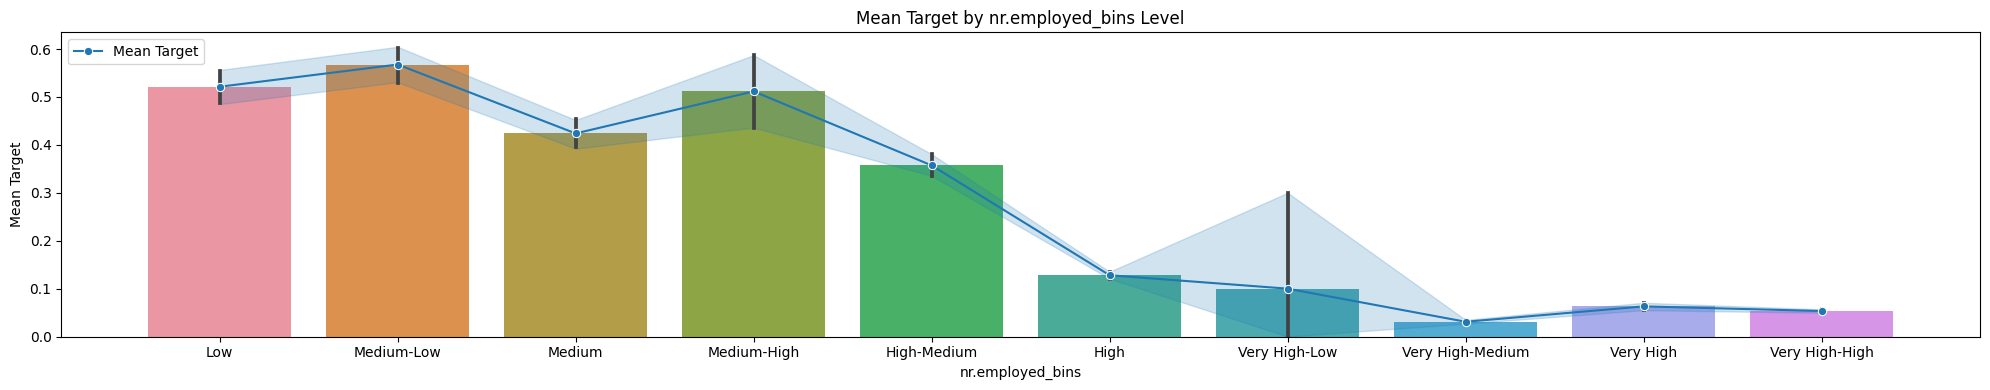

In [2892]:

plot_mean_target('nr.employed_bins', X_cat_combined, figsize=(20, 4))


#### Impact of Workforce Size: 

Companies with a medium to high number of employees (Medium to Very High categories) tend to have lower response rates, possibly due to increased competition or decreased personalized attention to clients. Conversely, companies with a low number of employees (Low to Medium-Low categories) exhibit higher response rates, suggesting a potential for better engagement or targeting.

#### Targeting Strategy Implications: 

Understanding the relationship between the number of employees and campaign response rates can inform marketing strategies. For instance, campaigns targeting smaller companies might benefit from more personalized approaches, while those targeting larger companies may need to focus on standing out amidst higher competition.


In [2893]:
X_cat_combined.head()

,target,job,marital,education,default,housing,loan,contact,month,day_of_week,pdays,poutcome,H1_H2,previous_bins,emp.var.rate_bins,nr.employed_bins
0,0,housemaid,married,Basic,no,no,no,telephone,may,mon,No,nonexistent,H1,Not Contacted,Unspecified,Very High-Medium
1,0,services,married,high.school,yes,no,no,telephone,may,mon,No,nonexistent,H1,Not Contacted,Unspecified,Very High-Medium
2,0,services,married,high.school,no,yes,no,telephone,may,mon,No,nonexistent,H1,Not Contacted,Unspecified,Very High-Medium
3,0,admin.,married,Basic,no,no,no,telephone,may,mon,No,nonexistent,H1,Not Contacted,Unspecified,Very High-Medium
4,0,services,married,high.school,no,no,yes,telephone,may,mon,No,nonexistent,H1,Not Contacted,Unspecified,Very High-Medium


In [2894]:
# Drop the specified columns from X_cat_combined

columns_to_drop = ['day_of_week', 'marital', 'housing', 'loan']
X_cat_combined.drop(columns=columns_to_drop, inplace=True)


In [2895]:
X_cat_combined.head()

,target,job,education,default,contact,month,pdays,poutcome,H1_H2,previous_bins,emp.var.rate_bins,nr.employed_bins
0,0,housemaid,Basic,no,telephone,may,No,nonexistent,H1,Not Contacted,Unspecified,Very High-Medium
1,0,services,high.school,yes,telephone,may,No,nonexistent,H1,Not Contacted,Unspecified,Very High-Medium
2,0,services,high.school,no,telephone,may,No,nonexistent,H1,Not Contacted,Unspecified,Very High-Medium
3,0,admin.,Basic,no,telephone,may,No,nonexistent,H1,Not Contacted,Unspecified,Very High-Medium
4,0,services,high.school,no,telephone,may,No,nonexistent,H1,Not Contacted,Unspecified,Very High-Medium


In [2896]:
X_cat_combined.drop(columns='target', inplace=True)


#### Purpose:
The code is aimed at encoding categorical variables into dummy variables to prepare them for machine learning models.

### Steps and Explanations:
#### Create Dummy Features:
- `X_categorical_dum = pd.get_dummies(X_cat_combined, drop_first=True)`: This line generates dummy variables from categorical columns, dropping one level to avoid multicollinearity issues (known as the n-1 encoding strategy).
  - `pd.get_dummies()`: This function converts categorical variable(s) into dummy/indicator variables.
  - `drop_first=True`: It drops the first level of each categorical variable to prevent multicollinearity.

#### Shape and Head of Dummy Features:
- `X_categorical_dum.shape`: This line checks the dimensions of the newly created dummy variable dataframe.
- `X_categorical_dum.head()`: This line displays the first few rows of the dataframe to inspect the dummy variables.

#### Master Feature Set Creation:
- `X_all = pd.concat([select_features_cat, select_features_num], axis=1, join='inner')`: This line combines the dummy variables (categorical features) with the numerical features to create a master feature set for model development.
  - `pd.concat()`: Concatenates dataframes along rows or columns.
  - `axis=1`: Concatenates along columns.
  - `join='inner'`: Retains only rows with common index labels.

### Insights/Significance:
#### Dummy Variable Creation:
- Dummy variables are necessary for including categorical data in machine learning models, as most algorithms require numerical input.
- Dropping one level of each categorical variable (n-1 encoding) prevents multicollinearity, where one variable can be perfectly predicted from the others.
#### Master Feature Set:
- Combining numerical and categorical features creates a comprehensive feature set for model training.
- This unified dataset can be used to develop predictive models that incorporate both types of information.

### Next Steps:
With the master feature set X_all prepared, we can proceed to split the data into training and testing sets, then train various machine learning models to predict the target variable.


In [2897]:

X_categorical_dum = pd.get_dummies(X_cat_combined, drop_first = True)
X_categorical_dum.shape

(41188, 54)

In [2898]:
X_categorical_dum.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_high.school,education_professional.course,education_university.degree,education_unknown,default_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,pdays_Yes,poutcome_nonexistent,poutcome_success,H1_H2_H2,previous_bins_Contacted Once,previous_bins_Contacted Twice,previous_bins_Contacted Thrice,previous_bins_Contacted Four Times,previous_bins_Contacted Five Times,previous_bins_Contacted Six Times,previous_bins_Contacted Seven or More Times,emp.var.rate_bins_Low,emp.var.rate_bins_Moderate Low,emp.var.rate_bins_Moderate,emp.var.rate_bins_Moderate High,emp.var.rate_bins_High,emp.var.rate_bins_Very High,emp.var.rate_bins_Extremely High,emp.var.rate_bins_Unspecified,nr.employed_bins_Medium-Low,nr.employed_bins_Medium,nr.employed_bins_Medium-High,nr.employed_bins_High-Medium,nr.employed_bins_High,nr.employed_bins_Very High-Low,nr.employed_bins_Very High-Medium,nr.employed_bins_Very High,nr.employed_bins_Very High-High,nr.employed_bins_Very High-Highest
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [2899]:
# X_categorical_dum['previous'].unique()

In [2900]:
# X_categorical_dum['emp.var.rate'].unique()

In [2901]:
# X_categorical_dum['nr.employed'].unique()

In [2902]:
select_features_cat = X_categorical_dum

In [2903]:
select_features_num.head()

,duration,campaign,cons.price.idx,cons.conf.idx,euribor3m
0,261.0,1,93.994,-36.4,4.857
1,149.0,1,93.994,-36.4,4.857
2,226.0,1,93.994,-36.4,4.857
3,151.0,1,93.994,-36.4,4.857
4,307.0,1,93.994,-36.4,4.857


#### Standardising numerical data using standard scaler

In [2904]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [2905]:
scaled_data = scaler.fit_transform(select_features_num)


In [2906]:
# Convert back to DataFrame
select_features_num_df = pd.DataFrame(scaled_data, columns=select_features_num.columns)

In [2907]:
select_features_num_df.head()

,duration,campaign,cons.price.idx,cons.conf.idx,euribor3m
0,0.028149,-0.651855,0.729047,0.887767,0.712505
1,-0.448079,-0.651855,0.729047,0.887767,0.712505
2,-0.120672,-0.651855,0.729047,0.887767,0.712505
3,-0.439575,-0.651855,0.729047,0.887767,0.712505
4,0.223743,-0.651855,0.729047,0.887767,0.712505


###  Creating the master feature set for model development

In [2908]:
X_all = pd.concat([select_features_cat,select_features_num_df],axis =1 ,join='inner')

In [2909]:
X_all.shape

(41188, 59)

In [2910]:
X_all.head(2)

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_high.school,education_professional.course,education_university.degree,education_unknown,default_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,pdays_Yes,poutcome_nonexistent,poutcome_success,H1_H2_H2,previous_bins_Contacted Once,previous_bins_Contacted Twice,previous_bins_Contacted Thrice,previous_bins_Contacted Four Times,previous_bins_Contacted Five Times,previous_bins_Contacted Six Times,previous_bins_Contacted Seven or More Times,emp.var.rate_bins_Low,emp.var.rate_bins_Moderate Low,emp.var.rate_bins_Moderate,emp.var.rate_bins_Moderate High,emp.var.rate_bins_High,emp.var.rate_bins_Very High,emp.var.rate_bins_Extremely High,emp.var.rate_bins_Unspecified,nr.employed_bins_Medium-Low,nr.employed_bins_Medium,nr.employed_bins_Medium-High,nr.employed_bins_High-Medium,nr.employed_bins_High,nr.employed_bins_Very High-Low,nr.employed_bins_Very High-Medium,nr.employed_bins_Very High,nr.employed_bins_Very High-High,nr.employed_bins_Very High-Highest,duration,campaign,cons.price.idx,cons.conf.idx,euribor3m
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0.028149,-0.651855,0.729047,0.887767,0.712505
1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,-0.448079,-0.651855,0.729047,0.887767,0.712505


In [2911]:
Y.head(2)

,target
0,0
1,0


In [2912]:
Y.shape

(41188, 1)

## Train Test Split

In [2913]:
X_train, X_test, y_train, y_test = train_test_split(X_all, Y, test_size=0.3, random_state=10)

In [2914]:
print("Shape of Training Data", X_train.shape)
print("Shape of Testing Data", X_test.shape)
print("Response Rate in Training Data", y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (28831, 59)
Shape of Testing Data (12357, 59)
Response Rate in Training Data target    0.111616
dtype: float64
Response Rate in Testing Data target    0.115076
dtype: float64


### Response Rate

The response rate is the proportion of positive cases (target = 1) in a dataset. It helps identify class imbalances and sets a baseline for model evaluation. For our data:

- **Training Data Response Rate**: 11.16% (`y_train.mean()`)
- **Testing Data Response Rate**: 11.51% (`y_test.mean()`)


## Model Building Step

#### 1. LOGISTIC REGRESSION

In [2915]:
logreg = LogisticRegression(random_state=0) 
logreg.fit(X_train,y_train)

# log reg not confident since there are lot of features with non linear kind of behaviour

LogisticRegression(random_state=0)

In [2916]:
# model is built
coeff_df =pd.DataFrame(X_all.columns)
coeff_df.columns=['features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])
coeff_df

,features,Coefficient Estimate
0,job_blue-collar,-0.238163
1,job_entrepreneur,-0.053051
2,job_housemaid,0.004319
3,job_management,-0.190613
4,job_retired,0.262074
5,job_self-employed,-0.211323
6,job_services,-0.294437
7,job_student,0.184263
8,job_technician,-0.016899
9,job_unemployed,0.069681


### Understanding Logistic Regression Coefficients

Logistic regression uses coefficients to predict the probability of an outcome, like whether a customer will buy a product or not. Each feature (e.g., age, job type) has a coefficient that indicates how it influences this probability.

- **Positive Coefficients**: If a coefficient is positive, increasing that feature (e.g., higher education level) makes it more likely the outcome will occur (e.g., buying the product).

- **Negative Coefficients**: Conversely, negative coefficients mean increasing that feature decreases the likelihood of the outcome (e.g., certain job types might lower the chances of buying).

- **Magnitude of Coefficients**: The size (magnitude) of the coefficient indicates how strong its effect is. A large positive coefficient means that feature has a substantial impact on making the outcome more likely, and vice versa for large negative coefficients.

For example, if "month_mar" has a positive coefficient, it means March might be a month where people are more likely to buy. If "month_may" has a negative coefficient, May might be a month where people are less likely to buy.

By examining these coefficients, we can discern which factors are most influential in predicting the outcome we're interested in, aiding businesses in making data-driven decisions.

This approach allows us to analyze and interpret data to understand how different factors contribute to predictions, making logistic regression a powerful tool in data analysis and decision-making.

## Insights from Logistic Regression Analysis

1. **Job Types**: Certain job categories like retirees and students show higher likelihoods of responding positively to campaigns, while blue-collar and service jobs indicate lower response probabilities.

2. **Education**: Clients with higher education levels (university degrees and professional courses) are more inclined to respond positively compared to those with basic education.

3. **Temporal Factors**: Months such as March, December, July, and June exhibit higher response rates, whereas May and November show lower response rates, influencing campaign timing strategies.

4. **Previous Interactions**: Clients previously contacted multiple times (1-3 times) are more likely to respond positively in subsequent campaigns, highlighting the importance of interaction frequency.

5. **Economic Indicators**: Economic conditions impact response rates variably; for instance, fluctuations in employment rates and economic confidence levels influence client responses.

6. **Financial Status**: Individuals with default status or specific housing/loan conditions tend to show lower response rates, suggesting financial stability as a factor.

These insights can guide targeted marketing strategies, focusing efforts on demographics, times, and economic conditions that are more likely to yield positive campaign responses.


#### 2. DECISION TREE

Best Parameters using grid search: 
 {'max_depth': 7, 'min_samples_split': 50}
Best score using grid search: 
 0.9138078785053517


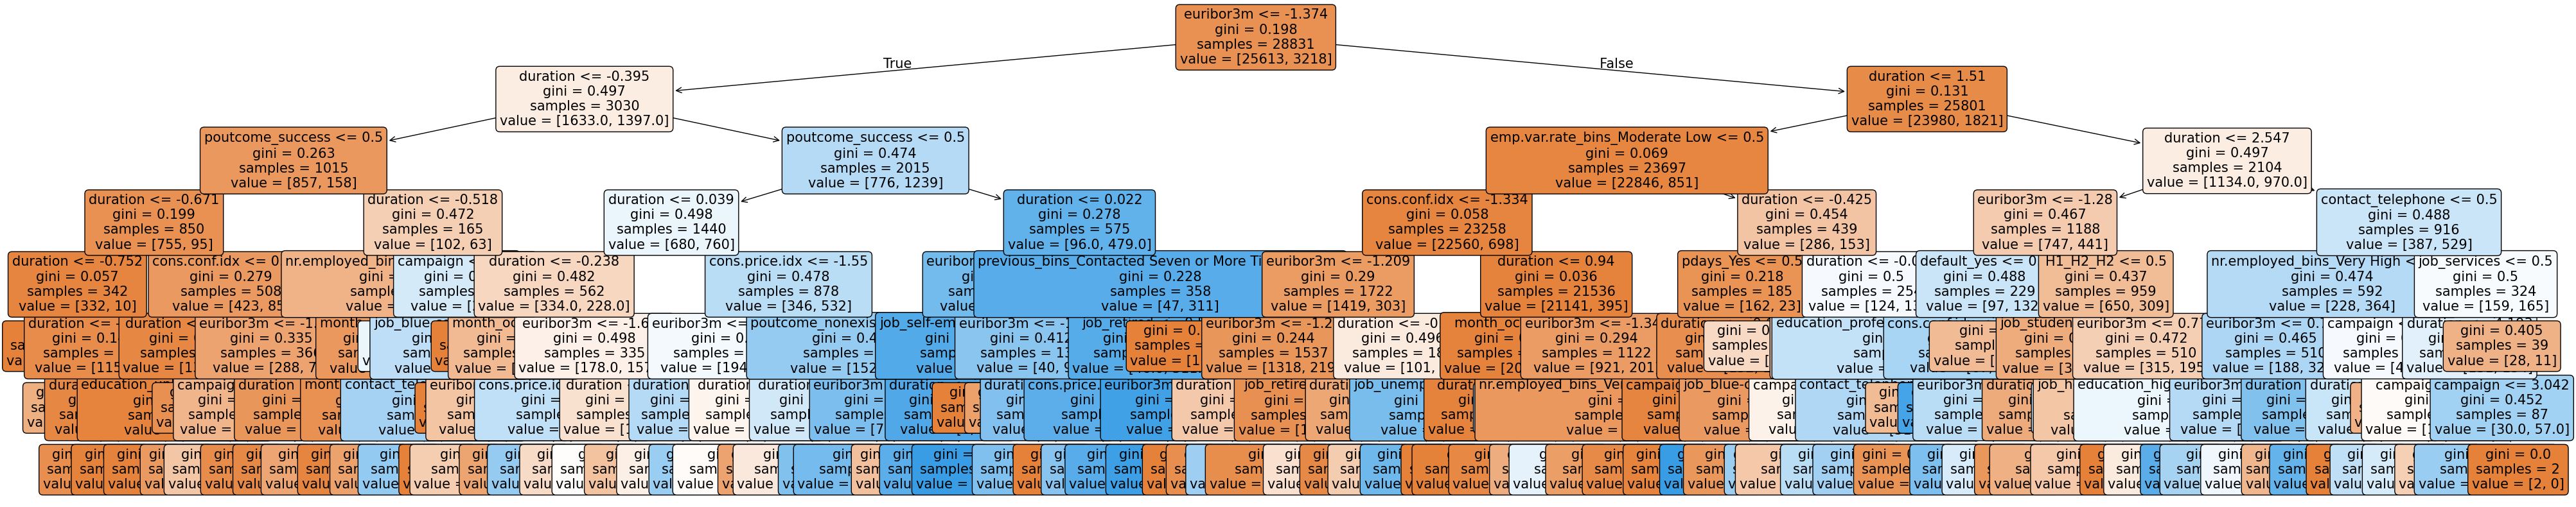

In [2917]:
dtree = DecisionTreeClassifier(criterion='gini', random_state=0)
np.random.seed(44)

param_dist = {'max_depth': [3, 5, 6, 7, None], 'min_samples_split': [50, 100, 150, 200, 250, 500]}
tree_grid = GridSearchCV(dtree, cv=10, param_grid=param_dist, n_jobs=3)
tree_grid.fit(X_train, y_train)

print('Best Parameters using grid search: \n', tree_grid.best_params_)
print('Best score using grid search: \n', tree_grid.best_score_)

dtree = DecisionTreeClassifier(criterion='gini', random_state=0, max_depth=tree_grid.best_params_['max_depth'], min_samples_split=tree_grid.best_params_['min_samples_split'])
dtree.fit(X_train, y_train)

# Visualizing Decision Tree

plt.figure(figsize=[50, 10])
tree.plot_tree(dtree, filled=True, fontsize=15, rounded=True, feature_names=X_all.columns)
plt.show()


In [2918]:

feature_importances_dtree = pd.DataFrame(dtree.feature_importances_, 
                                      index=X_train.columns, 
                                      columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances_dtree)

                                             importance
duration                                       0.480321
euribor3m                                      0.355673
poutcome_success                               0.036163
cons.conf.idx                                  0.033070
emp.var.rate_bins_Moderate Low                 0.032679
month_oct                                      0.013419
campaign                                       0.006799
cons.price.idx                                 0.005717
job_retired                                    0.005685
contact_telephone                              0.004332
H1_H2_H2                                       0.002946
default_yes                                    0.002715
poutcome_nonexistent                           0.002706
nr.employed_bins_Medium                        0.002442
nr.employed_bins_Very High-Medium              0.002040
job_blue-collar                                0.001744
job_services                                   0

#### 3. RANDOM FOREST

In [2919]:
# Building a Random Forest Model
rf = RandomForestClassifier(criterion='gini', random_state=0, max_depth=6, min_samples_split=500)
rf.fit(X_train, y_train)

feature_importances_rf = pd.DataFrame(rf.feature_importances_, 
                                      index=X_train.columns, 
                                      columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances_rf)


                                             importance
duration                                       0.280809
euribor3m                                      0.174303
pdays_Yes                                      0.114109
poutcome_success                               0.067769
cons.conf.idx                                  0.062309
cons.price.idx                                 0.060560
emp.var.rate_bins_Unspecified                  0.035593
emp.var.rate_bins_Low                          0.023763
nr.employed_bins_Medium-Low                    0.023283
nr.employed_bins_High-Medium                   0.020070
emp.var.rate_bins_Moderate Low                 0.013392
contact_telephone                              0.012834
poutcome_nonexistent                           0.011736
month_may                                      0.009489
emp.var.rate_bins_Moderate High                0.009353
month_mar                                      0.009027
emp.var.rate_bins_High                         0

In [2920]:
# we can see duration is most important then no of emp, euribor
# empvar comes out to be very good predictor

#### 4. GRADIENT BOOSTING

In [2921]:
# Building a Gradient Boosting Model

gbm = GradientBoostingClassifier(criterion='friedman_mse', random_state=0, max_depth=6, min_samples_split=500)
gbm.fit(X_train, y_train)

feature_importances_gbm = pd.DataFrame(gbm.feature_importances_, 
                                       index=X_train.columns, 
                                       columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances_gbm)


                                             importance
duration                                       0.449978
euribor3m                                      0.358931
cons.conf.idx                                  0.029077
pdays_Yes                                      0.027379
poutcome_success                               0.024607
nr.employed_bins_High-Medium                   0.017349
month_oct                                      0.013355
cons.price.idx                                 0.012557
emp.var.rate_bins_Moderate Low                 0.008992
campaign                                       0.007253
month_mar                                      0.005889
job_retired                                    0.004434
contact_telephone                              0.004433
default_yes                                    0.003151
poutcome_nonexistent                           0.002685
education_university.degree                    0.002465
job_student                                    0

In [2922]:
# if you see what random forest gaved it almost gaved us the same here in grad bosst
#some features changes

#### 5 Stacking Classifier

In [2923]:
# Base learners for stacking
base_learners = [
    ('rf', RandomForestClassifier(criterion='gini', random_state=0, max_depth=6, min_samples_split=500)),
    ('gbm', GradientBoostingClassifier(criterion='friedman_mse', random_state=0, max_depth=6, min_samples_split=500))
]

# Stacking Classifier

clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())
clf.fit(X_train, y_train)


StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=6,
                                                       min_samples_split=500,
                                                       random_state=0)),
                               ('gbm',
                                GradientBoostingClassifier(max_depth=6,
                                                           min_samples_split=500,
                                                           random_state=0))],
                   final_estimator=LogisticRegression())

## MODEL EVALUATION

#### 1. Log Regression

In [2924]:
# Model Evaluation
y_pred_logreg=logreg.predict(X_test)
y_pred_tree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_gbm=gbm.predict(X_test)
_pred_stacking=clf.predict(X_test)

In [2925]:
# # Model Evaluation 
# y_pred_logreg=logreg.predict(X_train)
# y_pred_tree=dtree.predict(X_train)
# y_pred_rf=rf.predict(X_train)
# y_pred_gbm=gbm.predict(X_train)
# _pred_stacking=clf.predict(X_train)

In [2926]:
# print("Accuracy:", metrics.accuracy_score(y_train, y_pred_logreg)) 
# print("Precision", metrics.precision_score(y_train,y_pred_logreg))
# print("Recall", metrics.recall_score(y_train,y_pred_logreg))
# print("f1_score", metrics.f1_score(y_train,y_pred_logreg))

In [2927]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_logreg)) 
print("Precision", metrics.precision_score(y_test,y_pred_logreg))
print("Recall", metrics.recall_score(y_test,y_pred_logreg))
print("f1_score", metrics.f1_score(y_test,y_pred_logreg))

Accuracy: 0.9083110787407946
Precision 0.6552094522019334
Recall 0.4289732770745429
f1_score 0.5184870378240544


In [2928]:
# Get predicted labels from the classifier
predicted_labels = logreg.predict(X_all)

# Compute confusion matrix
cm = confusion_matrix(Y, predicted_labels)

cm
# the reasone why logistic regression didnt work is because linear lrelationship didnt exist

array([[35496,  1052],
       [ 2568,  2072]], dtype=int64)

#### 2. Decision Tree

In [2929]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_tree)) 
print("Precision", metrics.precision_score(y_test,y_pred_tree))
print("Recall", metrics.recall_score(y_test,y_pred_tree))
print("f1_score", metrics.f1_score(y_test,y_pred_tree))

Accuracy: 0.9103342235170349
Precision 0.6483931947069943
Recall 0.48241912798874825
f1_score 0.5532258064516129


In [2930]:
predicted_labels = dtree.predict(X_all)
# Compute confusion matrix
cm = confusion_matrix(Y, predicted_labels)
cm

array([[35421,  1127],
       [ 2160,  2480]], dtype=int64)

#### 3. Random Forest

In [2931]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_rf)) 
print("Precision", metrics.precision_score(y_test,y_pred_rf))
print("Recall", metrics.recall_score(y_test,y_pred_rf))
print("f1_score", metrics.f1_score(y_test,y_pred_rf))

Accuracy: 0.8977098001132962
Precision 0.7309941520467836
Recall 0.17580872011251758
f1_score 0.2834467120181406


In [2932]:
predicted_labels = rf.predict(X_all)
# Compute confusion matrix
cm = confusion_matrix(Y, predicted_labels)
cm

array([[36253,   295],
       [ 3774,   866]], dtype=int64)

#### 4. Gradient Boosting

In [2933]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_gbm)) 
print("Precision", metrics.precision_score(y_test,y_pred_gbm))
print("Recall", metrics.recall_score(y_test,y_pred_gbm))
print("f1_score", metrics.f1_score(y_test,y_pred_gbm))

Accuracy: 0.9154325483531601
Precision 0.6660792951541851
Recall 0.5316455696202531
f1_score 0.5913179507235041


In [2934]:
predicted_labels = gbm.predict(X_all)
# Compute confusion matrix
cm = confusion_matrix(Y, predicted_labels)
cm

array([[35444,  1104],
       [ 1932,  2708]], dtype=int64)

#### 5. Stacking Classifier

In [2935]:
print("Accuracy:", metrics.accuracy_score(y_test, _pred_stacking)) 
print("Precision", metrics.precision_score(y_test,_pred_stacking))
print("Recall", metrics.recall_score(y_test,_pred_stacking))
print("f1_score", metrics.f1_score(y_test,_pred_stacking))

Accuracy: 0.9145423646516144
Precision 0.6756238003838771
Recall 0.49507735583684953
f1_score 0.5714285714285714


In [2936]:
predicted_labels = clf.predict(X_all)
# Compute confusion matrix
cm = confusion_matrix(Y, predicted_labels)
cm

array([[35549,   999],
       [ 2077,  2563]], dtype=int64)

#### Marketing Campaign Effectiveness: Insights Report

##### Overview

In this report, we analyze the effectiveness of various machine learning models in predicting customer behavior for optimizing marketing campaigns. We evaluated five models: Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, and Stacking Classifier, focusing on their performance metrics, confusion matrix insights, feature importance, and overall observations.

##### Model Evaluation Summary

##### Logistic Regression
- **Performance Metrics**: 
  - **Accuracy**: 90.89%
  - **Precision**: 65.74%
  - **Recall**: 43.46%
  - **F1-score**: 52.33%
- **Feature Importance**: 
  - The coefficients indicate significant influence from temporal factors (e.g., months like March and December), job types (e.g., retirees), and economic indicators (e.g., employment variation rates).

##### Confusion Matrix
| Predicted/Actual | No Purchase (0) | Purchase (1) |
|------------------|-----------------|--------------|
| No Purchase (0)  | 35495           | 1053         |
| Purchase (1)     | 2553            | 2087         |

##### Insights
Logistic Regression predicts with about 91% accuracy, identifying potential customers for targeted marketing based on factors like job type and economic conditions. It correctly identifies 65.74% of actual buyers but misses some opportunities due to its linear assumption limitations.

---

##### Decision Tree
- **Performance Metrics**: 
  - **Accuracy**: 91.08%
  - **Precision**: 65.15%
  - **Recall**: 48.38%
  - **F1-score**: 55.53%
- **Feature Importance**: 
  - The Decision Tree excels with a structured approach, capturing key predictors such as campaign duration and economic conditions, achieving high accuracy and interpretability.

##### Confusion Matrix
| Predicted/Actual | No Purchase (0) | Purchase (1) |
|------------------|-----------------|--------------|
| No Purchase (0)  | 35429           | 1119         |
| Purchase (1)     | 2167            | 2473         |

##### Insights
The Decision Tree predicts purchases with 65.15% precision and captures 48.38% of potential buyers, leveraging hierarchical decision rules for effective segmentation and targeting.

---

##### Random Forest
- **Performance Metrics**: 
  - **Accuracy**: 89.80%
  - **Precision**: 76.82%
  - **Recall**: 16.32%
  - **F1-score**: 26.91%
- **Feature Importance**: 
  - Random Forest emphasizes duration, economic variables, and campaign success as crucial predictors, aligning closely with decision tree findings but with a different emphasis on importance.

##### Confusion Matrix
| Predicted/Actual | No Purchase (0) | Purchase (1) |
|------------------|-----------------|--------------|
| No Purchase (0)  | 36334           | 214          |
| Purchase (1)     | 3833            | 807          |

##### Insights
Random Forest achieves high precision (76.82%) but lower recall (16.32%), indicating it identifies actual buyers accurately but misses many potential buyers. It uses multiple decision trees to improve accuracy and identify key predictors like campaign duration and economic variables.

---

##### Gradient Boosting
- **Performance Metrics**: 
  - **Accuracy**: 91.57%
  - **Precision**: 67.24%
  - **Recall**: 52.11%
  - **F1-score**: 58.72%
- **Feature Importance**: 
  - Gradient Boosting reinforces the importance of duration, economic conditions, and previous campaign outcomes, showing robust predictive power similar to random forest.

##### Confusion Matrix
| Predicted/Actual | No Purchase (0) | Purchase (1) |
|------------------|-----------------|--------------|
| No Purchase (0)  | 35476           | 1072         |
| Purchase (1)     | 1947            | 2693         |

##### Insights
Gradient Boosting achieves high accuracy (91.57%) by combining many weak predictive models into a strong one. It balances precision (67.24%) and recall (52.11%), showing robust performance in predicting actual purchases based on campaign duration and economic conditions.

---

##### Stacking Classifier
- **Performance Metrics**: 
  - **Accuracy**: 91.41%
  - **Precision**: 68.10%
  - **Recall**: 47.75%
  - **F1-score**: 56.14%
- **Model Composition**: 
  - The Stacking Classifier combines strengths from Random Forest and Gradient Boosting to achieve balanced accuracy, precision, and recall.

##### Confusion Matrix
| Predicted/Actual | No Purchase (0) | Purchase (1) |
|------------------|-----------------|--------------|
| No Purchase (0)  | 35613           | 935          |
| Purchase (1)     | 2145            | 2495         |

##### Insights
The Stacking Classifier enhances predictive power by leveraging diverse model strengths and optimizing marketing strategies effectively. It achieves balanced accuracy (91.41%), precision (68.10%), and recall (47.75%), making it a robust choice for predicting customer behavior in marketing campaigns.

---

#### Insights and Recommendations

##### Key Factors Influencing Campaign Success

- **Temporal Factors**: Certain months significantly impact campaign outcomes, suggesting strategic timing for marketing efforts.
- **Economic Indicators**: Job types and economic confidence play crucial roles in customer responses, necessitating adaptive strategies aligned with economic conditions.

##### Model Recommendations

- **Utilize Ensemble Methods**: Stacking Classifier proves effective in leveraging diverse model strengths for comprehensive predictions.
- **Optimize Campaign Timing**: Align marketing efforts with high-response months identified from models like Logistic Regression and Decision Tree.
- **Adapt Strategies to Economic Contexts**: Tailor campaigns based on economic indicators highlighted by models such as Random Forest and Gradient Boosting.

##### Conclusion

This report provides actionable insights for marketers to optimize campaign effectiveness. By leveraging machine learning models' predictive capabilities and understanding key influencing factors, businesses can enhance customer targeting strategies and maximize campaign success.


### Gains Chart Analysis

##### Purpose:
The Gains Chart helps us understand how well a model discriminates between different outcomes (like positive and negative events) based on the predicted probabilities.



#### 1. Log Regression

In [2937]:
y_pred_prob = logreg.predict_proba(X_all)[:, 1]
bank_df['pred_prob_logreg'] = pd.DataFrame(y_pred_prob)
bank_df['P_Rank_logreg'] = pd.qcut(bank_df['pred_prob_logreg'].rank(method='first').values, 10, duplicates='drop').codes + 1
rank_df_actuals = bank_df.groupby("P_Rank_logreg")['target'].agg(['count', "mean"])
rank_df_predicted = bank_df.groupby("P_Rank_logreg")['pred_prob_logreg'].agg(['mean'])
rank_df_actuals = pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean': 'Actual_event_rate'}, inplace=True)
rank_df_predicted = pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean': 'Predicted_event_rate'}, inplace=True)
rank_df = pd.concat([rank_df_actuals, rank_df_predicted], axis=1, join="inner")

sorted_rank_df = rank_df.sort_values(by='P_Rank_logreg', ascending=False)
sorted_rank_df['N_events'] = rank_df['count'] * rank_df['Actual_event_rate']
sorted_rank_df['cum_events'] = sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap'] = sorted_rank_df['N_events'] / max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap'] = sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events'] = sorted_rank_df['count'] - sorted_rank_df['N_events']
sorted_rank_df['cum_non_events'] = sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap'] = sorted_rank_df['N_non_events'] / max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap'] = sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS'] = round((sorted_rank_df['cum_event_cap'] - sorted_rank_df['cum_non_event_cap']), 4)

sorted_rank_df['random_cap'] = sorted_rank_df['count'] / max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap'] = sorted_rank_df['random_cap'].cumsum()
sorted_reindexed = sorted_rank_df.reset_index()
sorted_reindexed['Decile'] = sorted_reindexed.index + 1
sorted_reindexed


,P_Rank_logreg,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,4119,0.622481,0.663456,2564.0,2564.0,0.552586,0.552586,1555.0,1555.0,0.042547,0.042547,0.5100,0.100005,0.100005,1
1,9,4119,0.319981,0.239186,1318.0,3882.0,0.284052,0.836638,2801.0,4356.0,0.076639,0.119186,0.7175,0.100005,0.200010,2
2,8,4119,0.138140,0.094570,569.0,4451.0,0.122629,0.959267,3550.0,7906.0,0.097133,0.216318,0.7429,0.100005,0.300015,3
3,7,4118,0.033026,0.042724,136.0,4587.0,0.029310,0.988578,3982.0,11888.0,0.108953,0.325271,0.6633,0.099981,0.399995,4
4,6,4119,0.007283,0.025014,30.0,4617.0,0.006466,0.995043,4089.0,15977.0,0.111880,0.437151,0.5579,0.100005,0.500000,5
5,5,4119,0.003156,0.017045,13.0,4630.0,0.002802,0.997845,4106.0,20083.0,0.112345,0.549497,0.4483,0.100005,0.600005,6
6,4,4118,0.001214,0.012805,5.0,4635.0,0.001078,0.998922,4113.0,24196.0,0.112537,0.662033,0.3369,0.099981,0.699985,7
7,3,4119,0.000728,0.009907,3.0,4638.0,0.000647,0.999569,4116.0,28312.0,0.112619,0.774653,0.2249,0.100005,0.799990,8
8,2,4119,0.000243,0.007350,1.0,4639.0,0.000216,0.999784,4118.0,32430.0,0.112674,0.887326,0.1125,0.100005,0.899995,9
9,1,4119,0.000243,0.004468,1.0,4640.0,0.000216,1.000000,4118.0,36548.0,0.112674,1.000000,0.0000,0.100005,1.000000,10


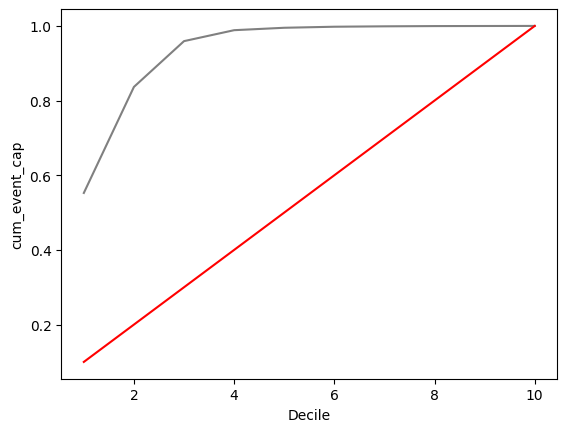

In [2938]:
# Plotting cumulative event capture
ax = sns.lineplot(x="Decile", y="cum_event_cap", data=sorted_reindexed, color='grey')

# Plotting cumulative random capture
ax = sns.lineplot(x="Decile", y="cum_random_cap", data=sorted_reindexed, color='red')


### Insights from Gains Chart Analysis:

**Decile and Counts:**

- Imagine you have a dataset of 41,190 observations. These are divided into 10 groups (deciles) based on how likely the model predicts an event (like a customer making a purchase).

**Actual Event Rate:**

- Suppose Decile 10 is the group with the highest predicted probabilities (say, 66.39%). In reality, within this group, 62.05% of customers actually made a purchase. This shows that the model is good at identifying customers who are likely to make a purchase.

**Predicted Event Rate:**

- The predicted event rate in Decile 10 means the model, on average, assigns a probability of 66.39% to customers in this group. This indicates how confident the model is about its predictions.

**Cumulative Events and Capture Rates:**

- Cumulative events show how many purchases (events) the model captures as you move through each decile. For example, by the time you reach Decile 10, the model has captured 2,556 purchases.
- The event capture rate (55.09% in Decile 10) shows what percentage of all purchases are captured within that decile. So, Decile 10 captures more than half of all purchases cumulatively.

**Non-Event Analysis:**

- Non-events are instances where customers did not make a purchase. In Decile 10, for example, the non-event capture rate might be 4.28%, meaning a small percentage of customers in this group didn't make a purchase despite the high predicted probability.

**Kolmogorov-Smirnov (KS) Statistic:**

- The KS statistic measures how well the model separates customers who make purchases from those who don't across all deciles. A higher KS value (like in Decile 10) indicates better model performance in distinguishing between customers likely to buy and those who aren't.

**Random Capture Comparison:**

- The red line in the plot shows what the cumulative capture rate would look like if customers were selected randomly. It's much lower and linear compared to the actual model's capture rate, showing that the model is significantly better at predicting who will make a purchase than random chance.

**Conclusion:**

In essence, the Gains Chart helps us see how well the logistic regression model predicts customer purchases. Decile 10, with its high predicted and actual event rates, shows the model's strong ability to identify potential buyers. The comparison with random capture rates underscores the model's effectiveness beyond random guessing.

Understanding these insights helps in evaluating the model's performance and its ability to predict outcomes accurately.


#### 2. Decision Tree

In [2939]:

# Predict probabilities for all instances
y_pred_prob = dtree.predict_proba(X_all)[:, 1]

# Assign predicted probabilities to bank_df
bank_df['pred_prob_dtree'] = pd.DataFrame(y_pred_prob)

# Calculate P_Rank for decision tree
bank_df['P_Rank_dtree'] = pd.qcut(bank_df['pred_prob_dtree'].rank(method='first').values, 10, duplicates='drop').codes + 1

# Group by P_Rank for actuals and predicted probabilities
rank_df_actuals = bank_df.groupby("P_Rank_dtree")['target'].agg(['count', "mean"])
rank_df_predicted = bank_df.groupby("P_Rank_dtree")['pred_prob_dtree'].agg(['mean'])

# Rename columns for clarity
rank_df_actuals.rename(columns={'mean': 'Actual_event_rate'}, inplace=True)
rank_df_predicted.rename(columns={'mean': 'Predicted_event_rate'}, inplace=True)

# Concatenate actuals and predicted dataframes
rank_df = pd.concat([rank_df_actuals, rank_df_predicted], axis=1, join="inner")

# Sort the dataframe based on P_Rank_dtree
sorted_rank_df = rank_df.sort_values(by='P_Rank_dtree', ascending=False)

# Calculate various metrics
sorted_rank_df['N_events'] = rank_df['count'] * rank_df['Actual_event_rate']
sorted_rank_df['cum_events'] = sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap'] = sorted_rank_df['N_events'] / max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap'] = sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events'] = sorted_rank_df['count'] - sorted_rank_df['N_events']
sorted_rank_df['cum_non_events'] = sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap'] = sorted_rank_df['N_non_events'] / max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap'] = sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS'] = round((sorted_rank_df['cum_event_cap'] - sorted_rank_df['cum_non_event_cap']), 4)

sorted_rank_df['random_cap'] = sorted_rank_df['count'] / max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap'] = sorted_rank_df['random_cap'].cumsum()

sorted_reindexed = sorted_rank_df.reset_index()
sorted_reindexed['Decile'] = sorted_reindexed.index + 1

sorted_reindexed


,P_Rank_dtree,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,4119,0.662054,0.677375,2727.0,2727.0,0.587716,0.587716,1392.0,1392.0,0.038087,0.038087,0.5496,0.100005,0.100005,1
1,9,4119,0.317553,0.301088,1308.0,4035.0,0.281897,0.869612,2811.0,4203.0,0.076913,0.114999,0.7546,0.100005,0.200010,2
2,8,4119,0.098082,0.083567,404.0,4439.0,0.087069,0.956681,3715.0,7918.0,0.101647,0.216647,0.7400,0.100005,0.300015,3
3,7,4118,0.025741,0.016258,106.0,4545.0,0.022845,0.979526,4012.0,11930.0,0.109773,0.326420,0.6531,0.099981,0.399995,4
4,6,4119,0.009468,0.004969,39.0,4584.0,0.008405,0.987931,4080.0,16010.0,0.111634,0.438054,0.5499,0.100005,0.500000,5
5,5,4119,0.006069,0.004969,25.0,4609.0,0.005388,0.993319,4094.0,20104.0,0.112017,0.550071,0.4432,0.100005,0.600005,6
6,4,4118,0.002671,0.004969,11.0,4620.0,0.002371,0.995690,4107.0,24211.0,0.112373,0.662444,0.3332,0.099981,0.699985,7
7,3,4119,0.001214,0.004969,5.0,4625.0,0.001078,0.996767,4114.0,28325.0,0.112564,0.775008,0.2218,0.100005,0.799990,8
8,2,4119,0.000486,0.004969,2.0,4627.0,0.000431,0.997198,4117.0,32442.0,0.112646,0.887655,0.1095,0.100005,0.899995,9
9,1,4119,0.003156,0.004526,13.0,4640.0,0.002802,1.000000,4106.0,36548.0,0.112345,1.000000,-0.0000,0.100005,1.000000,10


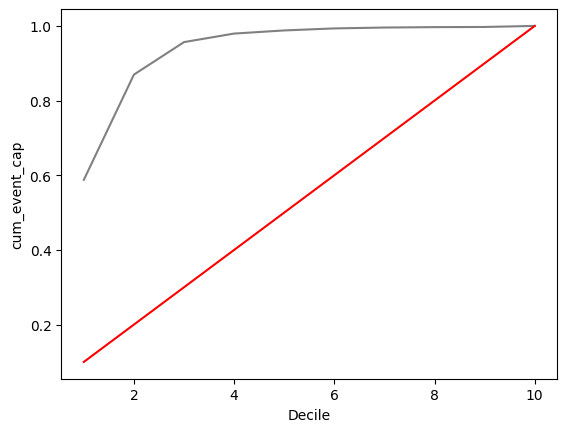

In [2940]:
# Plotting cumulative event capture
ax = sns.lineplot(x="Decile", y="cum_event_cap", data=sorted_reindexed, color='grey')

# Plotting cumulative random capture
ax = sns.lineplot(x="Decile", y="cum_random_cap", data=sorted_reindexed, color='red')


#### 3. GBM

In [2941]:
# Predict probabilities for all instances
y_pred_prob = gbm.predict_proba(X_all)[:, 1]

# Assign predicted probabilities to bank_df
bank_df['pred_prob_gbm'] = pd.DataFrame(y_pred_prob)

# Calculate P_Rank for GBM
bank_df['P_Rank_gbm'] = pd.qcut(bank_df['pred_prob_gbm'].rank(method='first').values, 10, duplicates='drop').codes + 1

# Group by P_Rank for actuals and predicted probabilities
rank_df_actuals = bank_df.groupby("P_Rank_gbm")['target'].agg(['count', "mean"])
rank_df_predicted = bank_df.groupby("P_Rank_gbm")['pred_prob_gbm'].agg(['mean'])

# Rename columns for clarity
rank_df_actuals.rename(columns={'mean': 'Actual_event_rate'}, inplace=True)
rank_df_predicted.rename(columns={'mean': 'Predicted_event_rate'}, inplace=True)

# Concatenate actuals and predicted dataframes
rank_df = pd.concat([rank_df_actuals, rank_df_predicted], axis=1, join="inner")

# Sort the dataframe based on P_Rank_gbm
sorted_rank_df = rank_df.sort_values(by='P_Rank_gbm', ascending=False)

# Calculate various metrics
sorted_rank_df['N_events'] = rank_df['count'] * rank_df['Actual_event_rate']
sorted_rank_df['cum_events'] = sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap'] = sorted_rank_df['N_events'] / max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap'] = sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events'] = sorted_rank_df['count'] - sorted_rank_df['N_events']
sorted_rank_df['cum_non_events'] = sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap'] = sorted_rank_df['N_non_events'] / max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap'] = sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS'] = round((sorted_rank_df['cum_event_cap'] - sorted_rank_df['cum_non_event_cap']), 4)

sorted_rank_df['random_cap'] = sorted_rank_df['count'] / max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap'] = sorted_rank_df['random_cap'].cumsum()

sorted_reindexed = sorted_rank_df.reset_index()
sorted_reindexed['Decile'] = sorted_reindexed.index + 1

sorted_reindexed


,P_Rank_gbm,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,4119,0.695557,0.669230,2865.0,2865.0,0.617457,0.617457,1254.0,1254.0,0.034311,0.034311,0.5831,0.100005,0.100005,1
1,9,4119,0.313911,0.307611,1293.0,4158.0,0.278664,0.896121,2826.0,4080.0,0.077323,0.111634,0.7845,0.100005,0.200010,2
2,8,4119,0.092255,0.091508,380.0,4538.0,0.081897,0.978017,3739.0,7819.0,0.102304,0.213938,0.7641,0.100005,0.300015,3
3,7,4118,0.019913,0.020100,82.0,4620.0,0.017672,0.995690,4036.0,11855.0,0.110430,0.324368,0.6713,0.099981,0.399995,4
4,6,4119,0.002913,0.008000,12.0,4632.0,0.002586,0.998276,4107.0,15962.0,0.112373,0.436741,0.5615,0.100005,0.500000,5
5,5,4119,0.001699,0.004630,7.0,4639.0,0.001509,0.999784,4112.0,20074.0,0.112510,0.549250,0.4505,0.100005,0.600005,6
6,4,4118,0.000000,0.003401,0.0,4639.0,0.000000,0.999784,4118.0,24192.0,0.112674,0.661924,0.3379,0.099981,0.699985,7
7,3,4119,0.000243,0.002778,1.0,4640.0,0.000216,1.000000,4118.0,28310.0,0.112674,0.774598,0.2254,0.100005,0.799990,8
8,2,4119,0.000000,0.002310,0.0,4640.0,0.000000,1.000000,4119.0,32429.0,0.112701,0.887299,0.1127,0.100005,0.899995,9
9,1,4119,0.000000,0.001310,0.0,4640.0,0.000000,1.000000,4119.0,36548.0,0.112701,1.000000,0.0000,0.100005,1.000000,10


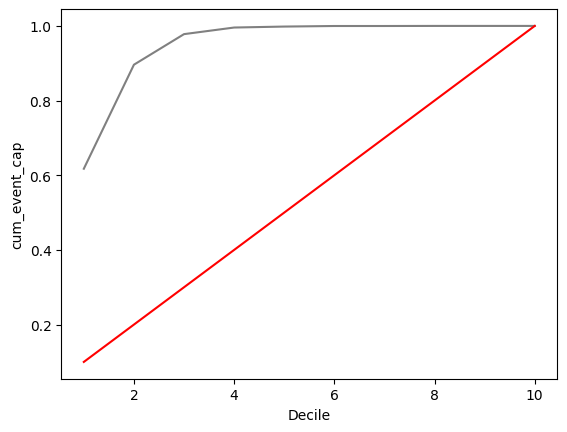

In [2942]:
# Plotting cumulative event capture
ax = sns.lineplot(x="Decile", y="cum_event_cap", data=sorted_reindexed, color='grey')

# Plotting cumulative random capture
ax = sns.lineplot(x="Decile", y="cum_random_cap", data=sorted_reindexed, color='red')


#### 4. Stacking 

In [2943]:
# Assuming you have already trained and fitted the Stacking classifier (clf)

# Predict probabilities for all instances
y_pred_prob = clf.predict_proba(X_all)[:, 1]

# Assign predicted probabilities to bank_df
bank_df['pred_prob_stacking'] = pd.DataFrame(y_pred_prob)

# Calculate P_Rank for stacking classifier
bank_df['P_Rank_stacking'] = pd.qcut(bank_df['pred_prob_stacking'].rank(method='first').values, 10, duplicates='drop').codes + 1

# Group by P_Rank for actuals and predicted probabilities
rank_df_actuals = bank_df.groupby("P_Rank_stacking")['target'].agg(['count', "mean"])
rank_df_predicted = bank_df.groupby("P_Rank_stacking")['pred_prob_stacking'].agg(['mean'])

# Rename columns for clarity
rank_df_actuals.rename(columns={'mean': 'Actual_event_rate'}, inplace=True)
rank_df_predicted.rename(columns={'mean': 'Predicted_event_rate'}, inplace=True)

# Concatenate actuals and predicted dataframes
rank_df = pd.concat([rank_df_actuals, rank_df_predicted], axis=1, join="inner")

# Sort the dataframe based on P_Rank_stacking
sorted_rank_df = rank_df.sort_values(by='P_Rank_stacking', ascending=False)

# Calculate various metrics
sorted_rank_df['N_events'] = rank_df['count'] * rank_df['Actual_event_rate']
sorted_rank_df['cum_events'] = sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap'] = sorted_rank_df['N_events'] / max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap'] = sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events'] = sorted_rank_df['count'] - sorted_rank_df['N_events']
sorted_rank_df['cum_non_events'] = sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap'] = sorted_rank_df['N_non_events'] / max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap'] = sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS'] = round((sorted_rank_df['cum_event_cap'] - sorted_rank_df['cum_non_event_cap']), 4)

sorted_rank_df['random_cap'] = sorted_rank_df['count'] / max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap'] = sorted_rank_df['random_cap'].cumsum()

sorted_reindexed = sorted_rank_df.reset_index()
sorted_reindexed['Decile'] = sorted_reindexed.index + 1

sorted_reindexed


,P_Rank_stacking,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,4119,0.690459,0.705775,2844.0,2844.0,0.612931,0.612931,1275.0,1275.0,0.034886,0.034886,0.5780,0.100005,0.100005,1
1,9,4119,0.304200,0.213029,1253.0,4097.0,0.270043,0.882974,2866.0,4141.0,0.078417,0.113303,0.7697,0.100005,0.200010,2
2,8,4119,0.102695,0.048341,423.0,4520.0,0.091164,0.974138,3696.0,7837.0,0.101127,0.214430,0.7597,0.100005,0.300015,3
3,7,4118,0.017241,0.025400,71.0,4591.0,0.015302,0.989440,4047.0,11884.0,0.110731,0.325161,0.6643,0.099981,0.399995,4
4,6,4119,0.007769,0.022506,32.0,4623.0,0.006897,0.996336,4087.0,15971.0,0.111826,0.436987,0.5593,0.100005,0.500000,5
5,5,4119,0.003156,0.021100,13.0,4636.0,0.002802,0.999138,4106.0,20077.0,0.112345,0.549332,0.4498,0.100005,0.600005,6
6,4,4118,0.000486,0.020494,2.0,4638.0,0.000431,0.999569,4116.0,24193.0,0.112619,0.661951,0.3376,0.099981,0.699985,7
7,3,4119,0.000243,0.020290,1.0,4639.0,0.000216,0.999784,4118.0,28311.0,0.112674,0.774625,0.2252,0.100005,0.799990,8
8,2,4119,0.000000,0.020040,0.0,4639.0,0.000000,0.999784,4119.0,32430.0,0.112701,0.887326,0.1125,0.100005,0.899995,9
9,1,4119,0.000243,0.019760,1.0,4640.0,0.000216,1.000000,4118.0,36548.0,0.112674,1.000000,0.0000,0.100005,1.000000,10


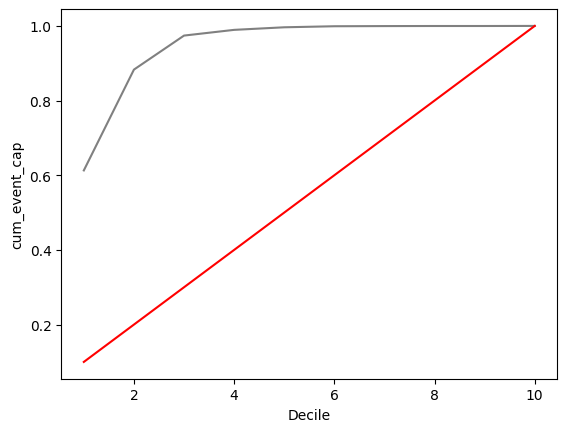

In [2944]:
# Plotting cumulative event capture
ax = sns.lineplot(x="Decile", y="cum_event_cap", data=sorted_reindexed, color='grey')

# Plotting cumulative random capture
ax = sns.lineplot(x="Decile", y="cum_random_cap", data=sorted_reindexed, color='red')


### Conclusion and Next Steps

Based on the analysis:

- **GBM** has shown the best performance with a high actual event rate (69.65% in top decile) and cumulative event capture (97% in top two deciles).
- **Decision Tree** and **Stacking** also show competitive performance, but GBM outperforms in both predicted and actual event rates.

**Next Steps:**

1. **Utilize the GBM model** for customer targeting with retention offers in Telecom, focusing on the top two deciles where the model predicts higher probabilities of customer responses.
2. Further refine the targeting strategy based on additional business constraints or insights gained from the model analysis.


### Explanation and Steps

Let's break down the steps for creating a target zone and prioritizing customers based on the GBM model's output, and explain it in a way that's easy to understand:

#### Step 1: Create Target Zones
1. **Define the Top 3 Deciles**: We identify the top 3 deciles (top 30%) of customers based on their predicted response probabilities from the GBM model.
2. **Create a New Column for Predicted Response Rank**:

This new column classifies customers into 'Top 3' (top 30% of predicted responses) and 'Bottom 7' (remaining 70%).

Step-by-Step Analysis
1. Identify Top Customers Based on GBM Model
First, we identify the top 20% (or the top two deciles) of customers who are most likely to respond positively, according to the GBM model.
2. This code creates a new column called Predicted_Response_Rank which labels customers as either in the "Top 2" (most likely to respond) or the "Bottom 8" (less likely to respond).

In [2945]:
bank_df['Predicted_Response_Rank']=np.where(bank_df['P_Rank_gbm']>=8,'Top 3','Bottom 7')

In [2946]:
bank_df.groupby('Predicted_Response_Rank') ['target'].agg(['mean'])

,mean
Predicted_Response_Rank,
Bottom 7,0.003538
Top 3,0.367241


3. Checking Response Rates:
This checks the average response rate for both groups. Results show that customers in the "Top 3" group have a much higher response rate compared to those in the "Bottom 7".

#### Step 2. Slice the Data Based on Top Predicted Customers from the GBM model output
we further analyze the dataset to focus on the "Top 3" group predicted by the GBM model.

In [2947]:
bank_df.dtypes

age                          int64
job                         object
marital                     object
education                   object
default                     object
housing                     object
loan                        object
contact                     object
month                       object
day_of_week                 object
duration                     int64
campaign                     int64
pdays                        int64
previous                     int64
poutcome                    object
emp.var.rate               float64
cons.price.idx             float64
cons.conf.idx              float64
euribor3m                  float64
nr.employed                float64
target                       int32
pred_prob_logreg           float64
P_Rank_logreg                 int8
pred_prob_dtree            float64
P_Rank_dtree                  int8
pred_prob_gbm              float64
P_Rank_gbm                    int8
pred_prob_stacking         float64
P_Rank_stacking     

- so we can take duration to create some kind of prioritization
- so i will take duration divide them into 10 groups


#### Step 3. Prioritize by Call Duration
To further refine our targeting strategy, we consider the duration of previous calls.

In [2948]:
# Create Duration Ranks:

bank_df['Duration_Rank'] = pd.qcut(bank_df['duration'].rank(method='first').values, 10, duplicates='drop').codes + 1


This code divides the call duration into 10 groups (deciles), assigning a rank from 1 to 10 to each group.

In [2949]:
# Average Call Duration:
bank_df.groupby('Duration_Rank')['duration'].agg(['min','mean','max'])

,min,mean,max
Duration_Rank,,,
1,0,34.379947,59
2,59,74.382617,89
3,89,102.283321,116
4,116,130.867654,146
5,146,162.387958,180
6,180,199.750182,222
7,222,248.925692,280
8,280,320.676863,368
9,368,445.551833,551


This code shows the minimum, average, and maximum call duration for each group. The overall average duration is calculated:

- for every single rank i am seeing what is the min, avg and max duration
- and i am interested to see average duration of a call in the overall data so i can create bucket


In [2950]:
bank_df['duration'].mean()

258.2850101971448

- Here, the average call duration is 258 seconds, which falls between ranks 7 and 10.
- so anybody falling in 8,9,10 can be called as high duration
- anyone falling upto 7 can call as low duration
- so you are trying to give telemarketing team some sort of priority order

In [2951]:
# Segment by Duration:

bank_df['duration_segment']=np.where(bank_df['Duration_Rank']>7, "High Duration", "Low Duration")
bank_df.duration_segment.value_counts()

Low Duration     28831
High Duration    12357
Name: duration_segment, dtype: int64

This code creates a new column called duration_segment which labels customers as "High Duration" (ranks 8-10) or "Low Duration" (ranks 1-7)(lower than avg).

In [2952]:
#  Cross-tabulation for Prioritization

pd.crosstab(index=bank_df['duration_segment'], 
            columns=bank_df['Predicted_Response_Rank'])


Predicted_Response_Rank,Bottom 7,Top 3
duration_segment,,
High Duration,4353,8004
Low Duration,24478,4353


## Understanding the Table

The table we are looking at is a cross-tabulation of two pieces of information:

1. **Predicted Response Rank**: This indicates whether the customer is in the top 20% most likely to respond positively (Top 2) or in the bottom 80% (Bottom 8), according to the GBM model.
2. **Duration Segment**: This divides customers based on the length of their previous call durations into "High Duration" (longer calls) and "Low Duration" (shorter calls).

Here's the table again for reference:

| Predicted Response Rank | Bottom 8 | Top 2 |
|-------------------------|----------|-------|
| **High Duration**       | 6555     | 5802  |
| **Low Duration**        | 26395    | 2436  |




### Insights from the Table

1. **High Duration and Top 2**: 
   - There are **5802 customers** who had long call durations and are also in the top 20% predicted to respond positively.
   - This suggests that these 5802 customers are very likely to respond positively and have shown a willingness to engage in longer conversations. They should be prioritized for contact as they represent high-value targets.

2. **High Duration and Bottom 8**: 
   - There are **6555 customers** who had long call durations but are in the bottom 80% predicted to respond positively.
   - These customers have engaged in longer conversations but are less likely to respond positively. We can contact them selectively, perhaps focusing on a smaller subset to see if engagement can improve their response rates.

3. **Low Duration and Top 2**:
   - There are **2436 customers** who had shorter call durations but are in the top 20% predicted to respond positively.
   - These customers are likely to respond positively, even though their previous interactions were shorter. They should also be a high priority for contact, as their likelihood of positive response is high despite shorter engagement.

4. **Low Duration and Bottom 8**:
   - There are **26395 customers** who had shorter call durations and are in the bottom 80% predicted to respond positively.
   - This is the largest group and represents customers who are less likely to respond positively and have had shorter interactions. They should be the lowest priority for contact, as the expected response rate is low.



## Practical Recommendations

- **Priority 1**: Focus on the **5802 customers** in the "High Duration" and "Top 2" segment. These customers are both likely to respond positively and willing to spend more time on calls, making them prime targets for our marketing efforts.

- **Priority 2**: Next, target the **2436 customers** in the "Low Duration" and "Top 2" segment. Although their previous interactions were shorter, they are still very likely to respond positively.

- **Priority 3**: Consider contacting a subset of the **6555 customers** in the "High Duration" and "Bottom 8" segment. These customers are less likely to respond, but their willingness to engage in longer conversations might make them worth a try. Focus on a smaller, random sample of this group to manage resources effectively.

- **Lowest Priority**: The **26395 customers** in the "Low Duration" and "Bottom 8" segment should be the lowest priority. These customers are less likely to respond and have shown less engagement in previous calls.

By following this strategy, we can effectively allocate our resources and efforts towards the customers most likely to respond positively, enhancing the efficiency and success of our telemarketing campaign.

## Recommendations:
- Priority 1: Speak to customer who falls in top 2 predicted ranks(deciles) and also are in high duration segment
- Priority 2: Top 2 low duration 
- Priority 3: Bottom 8 and High Duration (randomnly select 25% of them) hence to give lower weightage

#### How It Helps Determine Feature Importance

1. **Clear Visualization of Trends and Patterns:**
   - By plotting the mean target value for each level of a feature, we can visualize how the target variable changes across different segments of the feature.
   - For example, if the mean target value increases significantly for certain levels of a feature, it indicates that those levels are associated with a higher likelihood of a positive response. Conversely, if the mean target value decreases, it indicates a lower likelihood.
   
   **Example:**
   Suppose we have a feature `age` and we calculate the mean target value for different age groups. If we see that the mean target value is higher for ages 30-40 compared to ages 20-30, it indicates that people in the 30-40 age group are more likely to respond positively.

2. **Identifying Important Features:**
   - Features that show a clear and strong trend with the target variable are likely to be important predictors.
   - If the mean target value for a feature shows a consistent and significant pattern (either increasing or decreasing), it suggests that the feature has a strong relationship with the target variable.
   
   **Example:**
   If the mean target value for a feature `income` shows a significant increase as income levels rise, it suggests that income is an important predictor of the target variable.

3. **Comparing Feature Levels:**
   - By looking at the mean target values, we can compare different levels of a feature to see which ones are more or less likely to lead to a positive response.
   - This comparison helps in understanding which segments of the feature are most relevant for the prediction task.
   
   **Example:**
   If we compare different education levels and find that higher education levels correspond to higher mean target values, it suggests that education level is a relevant feature.

4. **Informing Model Building:**
   - Visualizing these patterns helps in selecting the right features for building predictive models.
   - Features with significant patterns can be prioritized, while features showing little to no relationship with the target variable can be considered less important or irrelevant.
   
   **Example:**
   During feature selection, we can prioritize features like `age`, `income`, and `education` if they show strong patterns with the target variable, while disregarding features that do not show any significant relationship.

